In [3]:
import re
from aochildes.dataset import AOChildesDataSet
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import words
from datasets import load_dataset


## AOChildes

In [4]:
nltk.download('words')

ds = AOChildesDataSet()

transcripts = ds.load_transcripts()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dpechi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Looking for transcripts in C:\Users\dpechi\Documents\AOCHILDES\aochildes\original_transcripts
Utterances before dropping rows: 1,379,962
Utterances after  dropping rows: 1,180,889
Preparing AOCHILDES transcripts...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


In [7]:
file = open('vocab_ages.txt', 'r')
lines = file.readlines()

In [6]:
ds.pipeline.df

,transcript_id,gloss,num_tokens,speaker_role,target_child_age,target_child_sex,type,collection_name
id,,,,,,,,
3052485,6973,what's that,2,Mother,NaN,NaN,question,Eng-NA
3052502,6973,it's a chicken,3,Mother,NaN,NaN,declarative,Eng-NA
3052529,6973,yeah,1,Mother,NaN,NaN,declarative,Eng-NA
3052549,6973,what's this,2,Mother,NaN,NaN,question,Eng-NA
3052563,6973,what is that,3,Mother,NaN,NaN,question,Eng-NA
...,...,...,...,...,...,...,...,...
3310535,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310575,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310618,7409,um hm,2,Investigator,1694.0625,NaN,declarative,Eng-NA


In [20]:
vocab_age_list = []
for n, line in enumerate(lines):
    if n%2==0:
        continue
    else:
        age = lines[n-1][:-2]
        vocab = list(line[1:-1].split(","))
        for word in vocab:
            vocab_age_list.append([age, word.replace(" ","").replace("'","").replace("]","")])

vocab_age_df = pd.DataFrame(vocab_age_list)
vocab_age_df['raw_age'] = vocab_age_df[0]
vocab_age_df['word'] = vocab_age_df[1]
vocab_age_df['age'] = vocab_age_df[0].astype('float')/365
vocab_age_df[['word','age','raw_age']].to_csv('CHILDES_vocab_age.csv')

In [33]:
vocab_age_group = vocab_age_df.groupby('age').count().reset_index().sort_values(by='age')
vocab_age_group['cum_count'] = vocab_age_group[0].cumsum()
vocab_age_group

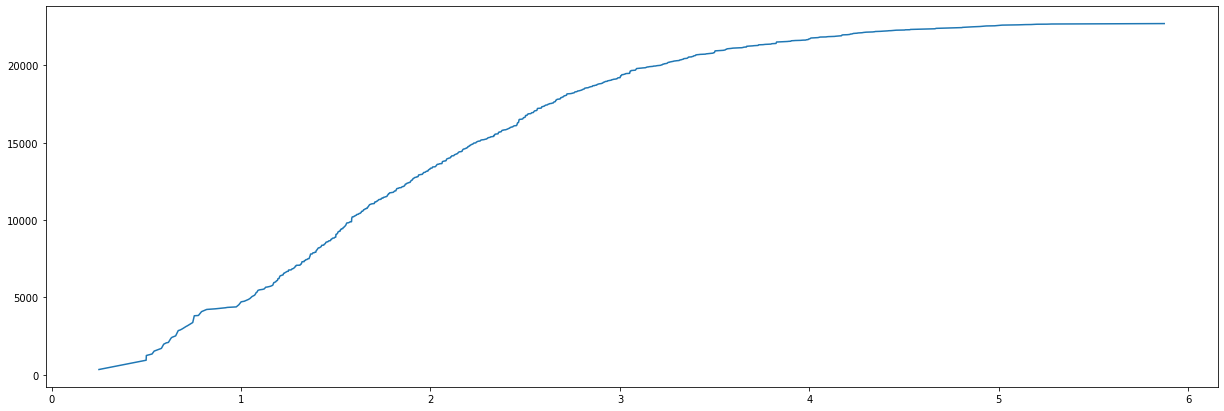

In [39]:
plt.figure(figsize=(21,7))

plt.plot(vocab_age_group['age']/365,vocab_age_group['cum_count'])

In [5]:
ds.pipeline.df.groupby('speaker_role').count()

,transcript_id,gloss,num_tokens,target_child_age,target_child_sex,type,collection_name
speaker_role,,,,,,,
Adult,7411,7411,7411,4871,4480,7411,7411
Aunt,798,798,798,762,385,798,798
Babysitter,8,8,8,8,0,8,8
Brother,3509,3509,3509,3509,1702,3509,3509
Camera_Operator,4724,4724,4724,4724,4724,4724,4724
Clinician,599,599,599,599,599,599,599
Cousin,94,94,94,94,94,94,94
Doctor,71,71,71,71,71,71,71
Environment,624,624,624,624,624,624,624


In [8]:
base_ds = ds.pipeline.df

base_ds_f = base_ds[base_ds['speaker_role']=="Participant"].groupby('transcript_id')['gloss'].apply(lambda x: ' '.join(x)).reset_index()

In [8]:
base_ds_age = base_ds.groupby('target_child_age')['gloss'].apply(lambda x: ' '.join(x)).reset_index()

In [12]:
base_ds_age['c'] = base_ds_age['gloss'].apply(lambda x: len(x.split(' ')))
base_ds_age['c_cum'] = base_ds_age['c'].cumsum()

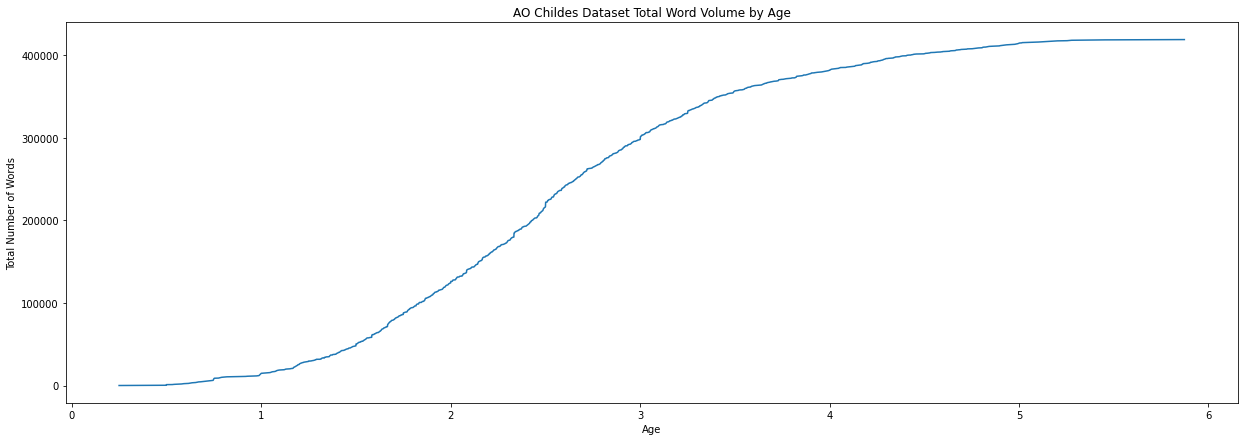

In [16]:
plt.figure(figsize=(21,7))
plt.xlabel('Age')
plt.ylabel('Total Number of Words')
plt.title('AO Childes Dataset Total Word Volume by Age')
plt.plot(base_ds_age['target_child_age']/365,base_ds_age['c_cum']/10)

In [14]:
base_ds[base_ds['speaker_role']=="Participant"]

,transcript_id,gloss,num_tokens,speaker_role,target_child_age,target_child_sex,type,collection_name
id,,,,,,,,
1554554,4330,xxx,1,Participant,NaN,NaN,declarative,Eng-NA
1554569,4330,why,1,Participant,NaN,NaN,question,Eng-NA
1554582,4330,what,1,Participant,NaN,NaN,question,Eng-NA
1554596,4330,why do you need the bad guy,7,Participant,NaN,NaN,question,Eng-NA
1554629,4330,why,1,Participant,NaN,NaN,question,Eng-NA
...,...,...,...,...,...,...,...,...
1592647,4360,dishes go in the cabinet,5,Participant,NaN,NaN,declarative,Eng-NA
1592672,4360,and all your clothes need to go,7,Participant,NaN,NaN,declarative,Eng-NA
1592704,4360,you can't play with the Legos,6,Participant,NaN,NaN,imperative_emphatic,Eng-NA


In [13]:
base_ds

,transcript_id,gloss,num_tokens,speaker_role,target_child_age,target_child_sex,type,collection_name
id,,,,,,,,
3052485,6973,what's that,2,Mother,NaN,NaN,question,Eng-NA
3052502,6973,it's a chicken,3,Mother,NaN,NaN,declarative,Eng-NA
3052529,6973,yeah,1,Mother,NaN,NaN,declarative,Eng-NA
3052549,6973,what's this,2,Mother,NaN,NaN,question,Eng-NA
3052563,6973,what is that,3,Mother,NaN,NaN,question,Eng-NA
...,...,...,...,...,...,...,...,...
3310535,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310575,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310618,7409,um hm,2,Investigator,1694.0625,NaN,declarative,Eng-NA


In [17]:
import time

In [43]:
vocab_dict2 = {}
bad_word_dict2 = {}
for n in range(base_ds.shape[0]):
    if n%1000 == 0:
        print(time.ctime())
        print(f"{round(100*n/float(1180889),2)}% Complete")
    #additional sentences
    acquired_vocab = base_ds.iloc[n]['gloss']
    
    new_utterance = acquired_vocab.split(' ')
    new_utterance = [re.sub('[,!@#$?;.\'-`"]', '', w.lower()) for w in new_utterance]
#     print(new_utterance)
    for word in new_utterance:
        #if it's a new word, add it, print the new words
        if word in words.words() or word[-3:]=='ion' or word[-3:]=='ing' or word[-3:]=='est' or word[-2:]=='er' or word[-2:]=='ed' or word[-1:] == 's':
            if word not in vocab_dict2:
                vocab_dict2[word] = 1
            else:
                vocab_dict2[word] += 1
        else:
            if word not in bad_word_dict2:
                bad_word_dict2[word] = 1
            else:
                bad_word_dict2[word] += 1


Thu Oct 20 14:37:29 2022
0.0% Complete


KeyboardInterrupt: 

In [36]:
# d = {'word':vocab_dict.keys(),'frequency':vocab_dict.values()}
# aochildes = pd.DataFrame(d)

d_bad = {'word':bad_word_dict.keys(),'frequency':bad_word_dict.values()}
aochildes_bad = pd.DataFrame(d_bad)

In [39]:
aochildes_bad.sort_values(by='frequency',ascending=False).to_csv('bad_words.csv')

In [34]:
aochildes[aochildes['frequency']<5].to_csv('rare_words.csv')

In [8]:
vocab_counts = []
vocab_dict = {}
for n in range(base_ds_f.shape[0]):
    #initialize no new vocab
    new_words = []
    #additional sentences
    acquired_vocab = base_ds.iloc[n]['gloss']
    
    new_utterance = acquired_vocab.split(' ')
    new_utterance = [re.sub('[!@#$?;.\'"]', '', w.lower()) for w in new_utterance]
    for word in new_utterance:
        #if it's a new word, add it, print the new words
        if word not in vocab_dict and word in words.words():
            vocab_dict[word] = 1
            new_words.append(word)
            
        else:
            continue

    age = base_ds.iloc[[n,0]].values[0][0]
    print(age)
    print(new_words)
    print(len(vocab_dict))
    
        
    vocab_counts.append([age, len(vocab_dict)])

In [10]:
vocab_counts

[]

In [20]:

vocab_counts_df = pd.DataFrame(vocab_counts)

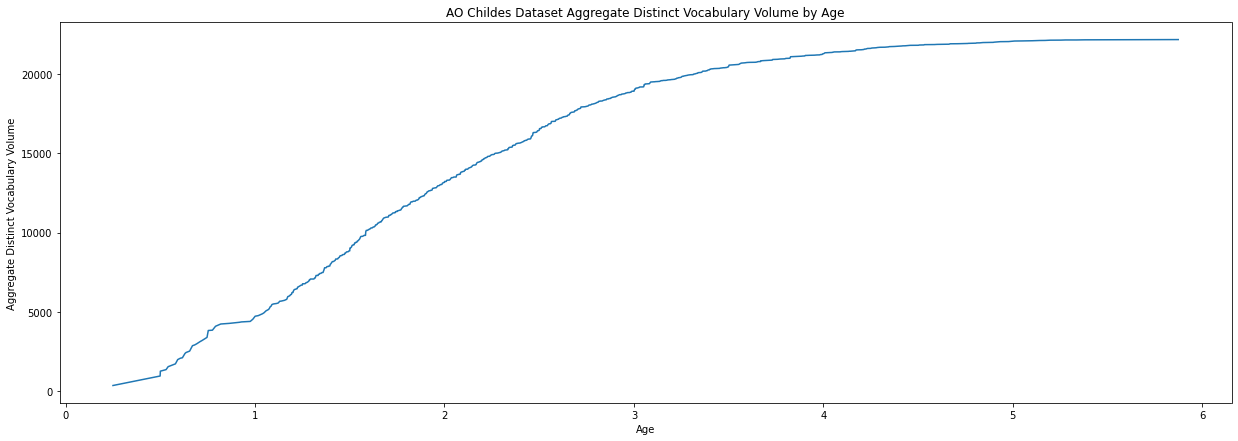

In [23]:


plt.figure(figsize=(21,7))
plt.xlabel('Age')
plt.ylabel('Aggregate Distinct Vocabulary Volume')
plt.title('AO Childes Dataset Aggregate Distinct Vocabulary Volume by Age')
plt.plot(vocab_counts_df[0]/365, vocab_counts_df[1])



In [32]:
child_age_distro = base_ds.groupby('target_child_age').count().reset_index()

,transcript_id,gloss,num_tokens,speaker_role,target_child_age,target_child_sex,type,collection_name
id,,,,,,,,
3052485,6973,what's that,2,Mother,NaN,NaN,question,Eng-NA
3052502,6973,it's a chicken,3,Mother,NaN,NaN,declarative,Eng-NA
3052529,6973,yeah,1,Mother,NaN,NaN,declarative,Eng-NA
3052549,6973,what's this,2,Mother,NaN,NaN,question,Eng-NA
3052563,6973,what is that,3,Mother,NaN,NaN,question,Eng-NA
...,...,...,...,...,...,...,...,...
3310535,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310575,7409,okay,1,Investigator,1694.0625,NaN,declarative,Eng-NA
3310618,7409,um hm,2,Investigator,1694.0625,NaN,declarative,Eng-NA


In [ ]:
base_ds['n_unique']

In [110]:
ds.pipeline.df.groupby('speaker_role').count()

,transcript_id,gloss,num_tokens,target_child_age,target_child_sex,type,collection_name
speaker_role,,,,,,,
Adult,7411,7411,7411,4871,4480,7411,7411
Aunt,798,798,798,762,385,798,798
Babysitter,8,8,8,8,0,8,8
Brother,3509,3509,3509,3509,1702,3509,3509
Camera_Operator,4724,4724,4724,4724,4724,4724,4724
Clinician,599,599,599,599,599,599,599
Cousin,94,94,94,94,94,94,94
Doctor,71,71,71,71,71,71,71
Environment,624,624,624,624,624,624,624


In [19]:
child_age_distro = ds.pipeline.df.groupby('target_child_age').count().reset_index()

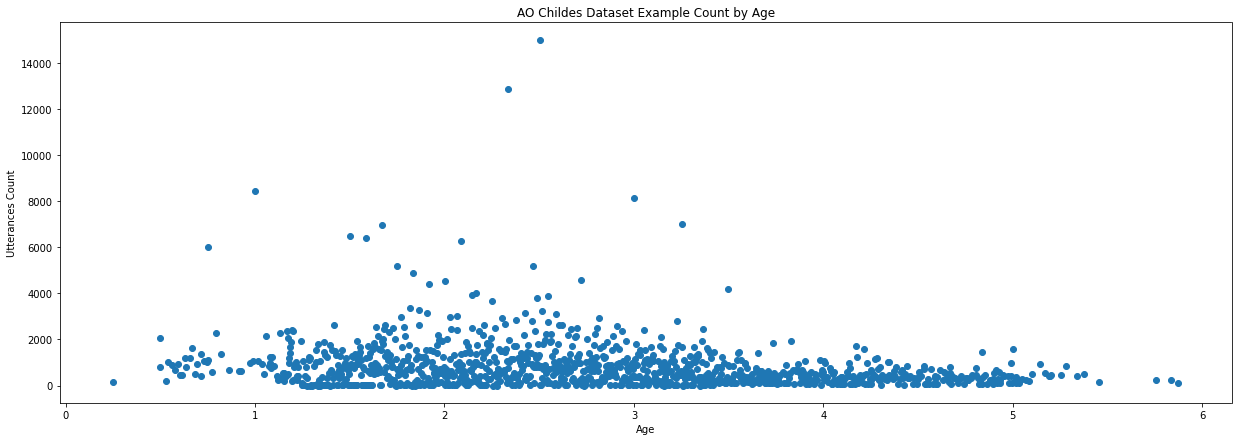

In [22]:


plt.figure(figsize=(21,7))
plt.xlabel('Age')
plt.ylabel('Utterances Count')
plt.title('AO Childes Dataset Example Count by Age')
plt.scatter(child_age_distro['target_child_age']/365, child_age_distro['transcript_id'])

## BookCorpus

In [24]:
bookcorpus_ds = load_dataset('bookcorpusopen')

Generating train split:   0%|          | 0/17868 [00:00<?, ? examples/s]

Dataset bookcorpusopen downloaded and prepared to C:\Users\dpechi\.cache\huggingface\datasets\bookcorpusopen\plain_text\1.0.0\315212253d9dae197e415587bddcc7d4650ba6eed7088a0185bc9bd5319de3ad. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
bookcorpus_ds['train']

Dataset({
    features: ['title', 'text'],
    num_rows: 17868
})

In [47]:
pip install py-readability-metrics

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dpechi\documents\test\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from readability import Readability
nltk.download('punkt')

book_levels = []
for book in bookcorpus_ds['train']:
    print(book['title'])
    r = Readability(book['text'])
    book_levels.append([book['title'],r])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpechi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


more-haste-the-marital-trials-of-brother-segun.epub.txt
the-amulet-custodian-novel-1.epub.txt
100-seconds-to-midnight.epub.txt
the-units.epub.txt
gateway-to-heaven.epub.txt
satan-the-sworn-enemy-of-mankind.epub.txt
the-dogs-may-bark-but-the-caravan-moves-on-the-spirit-realm-.epub.txt
3-book-romance-bundle-loving-the-bull-rider-cowboy-down-unde.epub.txt
the-arab-states-and-the-palestine-conflict.epub.txt
nine-ghost-stories.epub.txt
deviations-bloodlines.epub.txt
chronicles-of-han-behind-the-scenes-collection-of-public-blo.epub.txt
crown-of-thorns-the-race-to-clone-jesus-christ-book-one.epub.txt
rifted-clouds-all-three-parts.epub.txt
united-states-human-expedition.epub.txt
black-shadow-detective-agency-the-shadows-up-caper.epub.txt
stumps-of-mystery-stories-from-the-end-of-an-era.epub.txt
paranormal-revenge.epub.txt
the-human-soul-pseudo-spirituality.epub.txt
tales-of-marik-hammerhand-revolution-is-my-name.epub.txt
first-verse.epub.txt
saying-goodbye-the-christmas-gift.epub.txt
secret-of

bolas-tale-the-story-of-a-pack-of-abandoned-farm-dogs.epub.txt
love-actually.epub.txt
problem-solving-in-life.epub.txt
ghetto-cop-rookie-year.epub.txt
2020-year-of-stupidity.epub.txt
princess-wars.epub.txt
alamo-square.epub.txt
one-year-of-instants-2018.epub.txt
devotions-to-bring-peace-during-troubled-times.epub.txt
phantoms-in-the-smoke.epub.txt
warm-comforts.epub.txt
the-days-beyond.epub.txt
the-thrill-of-the-hunt.epub.txt
rock-island.epub.txt
a-prelude-to-nightmares.epub.txt
the-runaround-finding-the-faerie.epub.txt
dangerous-dana-a-suspense-thriller.epub.txt
soldiers-of-avarice.epub.txt
love-the-least-a-lot.epub.txt
at-aunt-verbenas-white-tree-publishing-edition.epub.txt
three-peaks-of-happiness.epub.txt
deceptions.epub.txt
fledglings-an-anthology.epub.txt
the-chronicles-of-the-abyss-volume-i.epub.txt
in-the-beginning-then-what-evolution-and-creation-johan-pete.epub.txt
mind-relief-manuscript.epub.txt
yesterdays-darkness.epub.txt
the-kanc.epub.txt
tis-the-season-for-villains.epub.

heroes-godsend.epub.txt
monster.epub.txt
monument.epub.txt
the-fairytale-keeper-part-one.epub.txt
bridging-the-gap-conversations-with-spirit-who-was-still-is-.epub.txt
disaster-productions.epub.txt
beyond-the-borders-volume-1.epub.txt
a-baby-boomer-at-any-age.epub.txt
credit-rush-outpost-krone-krone-series-book-1.epub.txt
max-and-julie.epub.txt
the-stars-of-locust-ridge.epub.txt
the-virtual-entity-part-1.epub.txt
solar-minimum.epub.txt
200-most-frequently-used-italian-words-2000-example-sentence.epub.txt
the-law-of-quantum.epub.txt
on-sleeping-beauties-a-foible.epub.txt
alana-weatherbee-book-1.epub.txt
the-longing-of-shiina-ryo-vol-1.epub.txt
sizzling-romance-new-york-style.epub.txt
unencumbered-love.epub.txt
sci-fi-women-interview-the-2018-2019-collection.epub.txt
reasons-for-recovery.epub.txt
the-really-true-history-of-george-washington.epub.txt
collecting-smiles.epub.txt
fig-leaves-and-other-christian-coverings-4-sermons.epub.txt
forbidden-the-bittersweet-vampire-chronicles-book-1.e

end-of-eternity.epub.txt
gone-fishin-escreen-format.epub.txt
through-the-bible-with-les-feldick-book-3.epub.txt
a-robots-tale.epub.txt
according-to-jesus.epub.txt
rapture-or-tribulation.epub.txt
hollywood-stardust-supporting-roles-giselle-wilson.epub.txt
everyone-belongs-whether-they-know-it-or-not-interviews-with.epub.txt
galactic-menace.epub.txt
sacrifice-of-ericc.epub.txt
the-marathon-of-faith-rio-2016.epub.txt
impossible-journey-a-tale-of-times-and-truth.epub.txt
after-the-cure.epub.txt
the-endonshan-chronicles-book-3-power.epub.txt
a-human-guide-to-bankruptcy.epub.txt
1964-2014-fao-investment-centre-50-years-of-development-supp.epub.txt
the-odd-bunnies.epub.txt
the-counts-son.epub.txt
a-decision-based-on-love.epub.txt
wall-of-secrets-book-one-of-the-vital-secrets-series.epub.txt
one-leap-year-of-instants-2016.epub.txt
tail-of-the-dragon.epub.txt
modern-goddess-trapped-by-thor-book-one.epub.txt
free-women.epub.txt
lascivious-ladies.epub.txt
killing-me-softly.epub.txt
the-truth-abou

collected-third-millennia-piffle.epub.txt
not-til-the-fat-lady-sings.epub.txt
communication-and-argument-in-the-quran.epub.txt
white-city-wordsmiths-volume-iii.epub.txt
so-much-to-lose.epub.txt
two-tickets-to-memphis.epub.txt
gods-king.epub.txt
silken-slippers-and-hobnail-boots-surviving-the-decline-and-.epub.txt
overcoming-obstacles-to-christian-growth.epub.txt
the-science-of-overcoming-procrastination-how-to-be-discipli.epub.txt
divinity-the-gathering-book-one.epub.txt
the-book-of-cakes.epub.txt
the-enchanted-writes-book-one.epub.txt
the-artists-boxer-yours-to-protect-book-one.epub.txt
the-universes-of-stephen-goldin.epub.txt
the-shadow-of-armageddon.epub.txt
the-profit-prophet.epub.txt
chasing-daybreak.epub.txt
pretty-003.epub.txt
sentaku-a-short-story-anthology.epub.txt
the-last-three.epub.txt
marvelous-four-in-and-out-of-danger-zone.epub.txt
the-inner-world.epub.txt
i-am-lance-richard-deity-lord-book-1.epub.txt
witch-ridden.epub.txt
the-rings-of-poseidon.epub.txt
medicus.epub.txt


a-demon-lady-with-love.epub.txt
grand-traitor.epub.txt
deaths-door.epub.txt
dreams-both-real-and-strange-i-and-ii.epub.txt
the-hardcore-scifi-collection-of-scifiguy3553.epub.txt
twelve-down.epub.txt
through-fire.epub.txt
bah-humbug-a-romantic-comedy-christmas-novella.epub.txt
i-bring-the-fire-part-i-wolves-a-loki-series.epub.txt
love-in-the-gospel.epub.txt
exponential.epub.txt
thank-you-for-ten-short-fiction-about-a-little-theater.epub.txt
blind-barriers-1-fragile-facade-project-scion.epub.txt
murder-in-woodbury-a-duty-to-warn-silent-plight.epub.txt
infested-cursed-ones-1.epub.txt
big-ban-theory-elementary-essence-applied-to-krypton-if-cher.epub.txt
talon-rise-of-the-pride-book-1.epub.txt
the-disappointment-of-glif-gatekeeper-limited-intersectional.epub.txt
the-awakening-dark-angels-of-music.epub.txt
trip-jet.epub.txt
if-the-shoe-fits.epub.txt
loving-eliza.epub.txt
battle-scars-a-collection-of-short-stories-volume-i.epub.txt
the-vampires-possession-book-1.epub.txt
presenting-islam-toda

the-knight-and-the-sorcerress-vol-1-the-end-and-the-beginnin.epub.txt
the-horse-in-the-mirror.epub.txt
skill-and-other-prose.epub.txt
from-nova-to-x-2-liaw-stories.epub.txt
close-your-eyes.epub.txt
forever-dreams-a-small-town-romance.epub.txt
the-future-of-the-middle-east.epub.txt
dirty-little-mermaids.epub.txt
admirals-island.epub.txt
the-essentials-of-prayer-how-christians-ought-to-pray.epub.txt
quantum-troopers-episode-18-geoplanes.epub.txt
the-kindest-people-heroes-and-good-samaritans-volume-2.epub.txt
a-body-in-the-backyard.epub.txt
1000-lines-magic-sequence.epub.txt
deviations-telzodo.epub.txt
the-federal-space-administration.epub.txt
evil-in-the-city.epub.txt
global-nuclear-security-moving-beyond-the-nss.epub.txt
30-below.epub.txt
finding-patience.epub.txt
the-dry-spell-a-tribute-to-dfw.epub.txt
sixfold-fiction-fall-2013.epub.txt
great-chasm-fixed.epub.txt
make-the-world-accessible-yourself-and-make-money-too.epub.txt
the-state-of-food-insecurity-in-the-world-2013.epub.txt
the-h

hidden-treasures-short-stories.epub.txt
man-and-the-beast.epub.txt
scorpions-sting-part-one.epub.txt
titanic.epub.txt
a-sprinkling-of-thought-dust.epub.txt
andy-the-spider-captured-volume-1.epub.txt
sacrilege.epub.txt
to-paris-venice-and-rome.epub.txt
forbidden-the-stars-the-interstellar-age-book-1.epub.txt
terrys-joke-collection-volume-seven-nurse-to-redneck-jokes.epub.txt
accidental-memory-in-the-case-of-death.epub.txt
the-fair-elf-princess.epub.txt
islam-the-religion-of-ease.epub.txt
the-secret-of-intelligible-light-qa-the-ultimate-qa-about-li.epub.txt
home.epub.txt
peregrinations.epub.txt
for-sale-in-palm-springs-a-henry-wright-mystery.epub.txt
review-of-christianity.epub.txt
tithe-or-hell-your-choice.epub.txt
catching-crabs.epub.txt
breaking-interstellar-android-lives-matter.epub.txt
turning-away-from-your-slavic-brother-the-effects-of-identit.epub.txt
i-am-vietnamese.epub.txt
a-man-for-triena.epub.txt
the-unbearable-ease-of-singing.epub.txt
the-war-of-civlar.epub.txt
the-fallen-s

how-to-beat-real-time-copyright-infringers-version-20-a-savv.epub.txt
big-ban-theory-elementary-essence-applied-to-nickel-atheism-.epub.txt
memoirs-of-aum-the-romance-of-the-gods-the-beginning-book-1.epub.txt
exploring-the-word-of-god-books-of-history-joshua-to-2-samue.epub.txt
sharing-in-gods-life-interviews-with-c-baxter-kruger.epub.txt
my-name-is-chaos.epub.txt
walking-with-the-father.epub.txt
we-are-at-war-study-guide.epub.txt
jeremy-chikalto-and-the-hazy-souls.epub.txt
seeking-warrior-king.epub.txt
lightspeed-magazine-august-2012.epub.txt
who-am-i.epub.txt
the-adventures-of-gannon-skyborn-the-shadowed-of-gilead.epub.txt
the-royale-prophecy.epub.txt
nobodys-story-book-one-the-golden-locket.epub.txt
love-and-decay-kanes-law.epub.txt
morning-in-melbourne.epub.txt
the-european-federalist-papers.epub.txt
silver-knight.epub.txt
the-adventures-of-james-and-newanda.epub.txt
said-the-spider.epub.txt
sliders-the-dark-side-of-transgender.epub.txt
swans-path.epub.txt
a-concordance-of-bible-bl

stephan.epub.txt
royal-playboy.epub.txt
novel-novel.epub.txt
victim-mentality-2-sermons.epub.txt
verum-et-inventa-magazine-issue-03.epub.txt
the-endonshan-chronicles-book-5-invasion.epub.txt
destination-paraguay.epub.txt
islams-reformers.epub.txt
carniform.epub.txt
hells-angel-episode-one.epub.txt
reel-sexy.epub.txt
wheels.epub.txt
death-times-two.epub.txt
a-spell-cast-volume-three.epub.txt
blinded-by-the-sun.epub.txt
the-legacy-of-princess-anlei.epub.txt
crown-phoenix-night-watchman-express.epub.txt
dogs-in-space-astros-adventures.epub.txt
real-dragons.epub.txt
shipmate-a-royal-regard-prequel-novella.epub.txt
soldier-at-the-door-book-2-forest-at-the-edge-series.epub.txt
through-a-strangers-eyes.epub.txt
how-to-humanize-your-online-class-with-voicethread.epub.txt
hemlock-and-the-dread-sorceress.epub.txt
the-vaticinator.epub.txt
rohort-went-to-france.epub.txt
till-death-do-us-part.epub.txt
ravenhurst-volume-i.epub.txt
in-a-glass-darkly.epub.txt
harry-and-bo-and-other-stories-from-a-ramb

satin-and-spurs.epub.txt
riparian-station.epub.txt
beyond-murphys-law.epub.txt
anahita.epub.txt
big-ban-theory-elementary-essence-applied-to-iron-al-dom-dum.epub.txt
a-part-of-me-in-you.epub.txt
gildas-haven.epub.txt
apocalypse-now.epub.txt
tarzan-of-the-apes-reswung.epub.txt
the-necromancer-whole-book.epub.txt
200-most-frequently-used-russian-words-2000-example-sentence.epub.txt
the-2014-2015-honolulu-real-estate-guide.epub.txt
born-to-fish-forced-to-work.epub.txt
extravagant-love.epub.txt
exit-nothing.epub.txt
ember-x-death-collectors-x-1.epub.txt
the-colour-of-nothing.epub.txt
murder-at-bear-ranch.epub.txt
sub-saharan-iditarod.epub.txt
duet.epub.txt
pure-blind-faith.epub.txt
pilgrimage.epub.txt
soul-life-soul-series-book-4.epub.txt
the-wrong-night.epub.txt
a-life-in-snow-a-world-shifters-story.epub.txt
that-eighteenth-summer.epub.txt
the-landlord.epub.txt
1st-peter-living-in-christ-bible-studycommentary-series.epub.txt
handsome-town.epub.txt
ganwolds-child.epub.txt
satellite-campus.

zombie-moon-rising-a-peter-brannigan-novella.epub.txt
long-night-in-the-valley.epub.txt
auguries-of-summer.epub.txt
tumbleweed-logic.epub.txt
narcissistic-and-psychopathic-leaders.epub.txt
the-cavalier-of-the-apocalypse.epub.txt
winters-fall-a-billionaire-romance.epub.txt
return-to-mazere.epub.txt
brood-of-bones.epub.txt
tomorrows-shadow-part-iii-full-circle.epub.txt
zandry-of-bonewood-and-other-stories.epub.txt
a-world-of-terror.epub.txt
conversations-with-the-light-bearer.epub.txt
root-magic.epub.txt
return-of-the-aliens.epub.txt
run-from-you.epub.txt
luminary-expanded-edition.epub.txt
powers.epub.txt
the-racetrack-chronicle.epub.txt
the-shadowverse.epub.txt
nypd-honor.epub.txt
omega.epub.txt
al-jaami-al-saheeh-volume-one.epub.txt
the-enemys-son.epub.txt
936-awesome-hacks-and-tricks.epub.txt
out-of-the-past-heritage-time-travel-romance-series-book-1.epub.txt
listen-to-me.epub.txt
once-a-mistress.epub.txt
time-meddlers.epub.txt
undeniable-book-one-the-oregon-trail-series.epub.txt
down

agathos-the-rocky-island-and-other-stories.epub.txt
holistic-healing-for-addiction-enlivening-body-mind-and-spir.epub.txt
joshua-and-the-promised-land.epub.txt
record-two-night-and-day.epub.txt
fantasy-quest-vampire-hack.epub.txt
the-lion-roars-a-guide-for-the-interpretation-of-the-book-of.epub.txt
jack-jackson-vs-the-midnight-army.epub.txt
face-time.epub.txt
how-to-raise-children-for-christ-a-guide-for-excellent-chris.epub.txt
the-secrets-of-ethan-falls.epub.txt
the-adventures-of-socrates-the-cat.epub.txt
polozenie-del-v-svazi-s-otsutstviem-prodovolstvennoj-bezopas.epub.txt
h-a-carter.epub.txt
a-tempting-taboo.epub.txt
identity-crisis-the-song-of-the-nagual.epub.txt
violet-sky.epub.txt
seven-sons-gypsy-brothers-1.epub.txt
dont-forget-to-water-the-flowers.epub.txt
angel-baby-featuring-groucho-chico-harpo-biden.epub.txt
skinny-thinking-for-men.epub.txt
flight-9525.epub.txt
the-human-soul-the-facade-self.epub.txt
diary-of-a-7th-grade-drama-queen.epub.txt
the-hidden-room-adventure-a-two-j

epilogue.epub.txt
for-women-only.epub.txt
dragons-pupils-the-sword-guest-part-1.epub.txt
commissioning-truths-essays-on-the-30th-anniversary-of-nunca.epub.txt
angel-in-the-shadows-book-1-by-lisa-grace-angel-series.epub.txt
real-estate-investing-how-to-find-cash-buyers-and-motivated-.epub.txt
one.epub.txt
scary-mary.epub.txt
the-legend-of-the-dragonskinner-the-dragonskinner-saga-book-.epub.txt
calling-forever-xander-barns-series-book-3.epub.txt
johnny-who.epub.txt
what-an-adventure.epub.txt
only-in-time-touched-by-magic-prequel.epub.txt
the-river-in-winter.epub.txt
the-ultimate-privilege-book-one-but-why.epub.txt
feel-me-break-a-novella.epub.txt
death-to-einstein-2-exposing-the-fatal-flaws-of-both-special.epub.txt
interpretation-of-the-twenty-ninth-part-of-the-holy-quran.epub.txt
someone-elses-war-a-novel-of-russia-and-america.epub.txt
the-english-refugee-the-day-it-happened-here.epub.txt
the-human-soul-emotional-processing.epub.txt
ford-at-valverde.epub.txt
the-alphas-concubine-the-moo

irreparable.epub.txt
untamed.epub.txt
fear-and-aggression.epub.txt
rediscovering-the-universe-the-beginning-of-the-final-revolu.epub.txt
civilization-of-virtues-i.epub.txt
lunch-with-sam.epub.txt
chasing-the-cash-life-vengeful-psychological-thriller-13.epub.txt
fighting-the-storm-cageside-chronicles-tommy-knuckles-trilog.epub.txt
a-chance-in-time.epub.txt
the-christian-philosophy-of-education-explained.epub.txt
big-ban-theory-elementary-essence-applied-to-palladium-calli.epub.txt
dangerous-a-bad-boy-mafia-romance.epub.txt
viewing-jasper-mountain.epub.txt
confessions-of-a-deputation-missionary.epub.txt
you-dont-belong.epub.txt
innocence-shadow-war-book-1-by-c-nault-and-m-findley.epub.txt
government-men.epub.txt
frequently-asked-questions-bible-bible-quotations-session-2.epub.txt
quests-and-quandaries.epub.txt
short-free-sample-the-sm-feminist.epub.txt
nightfall.epub.txt
devils-breach.epub.txt
under-the-arches.epub.txt
ink-stains-volume-1-a-dark-fiction-literary-anthology.epub.txt
beddin

journals-of-peter-perry-faith-on-ice.epub.txt
just-breathe.epub.txt
death-of-a-financier.epub.txt
enterprise-leader-facilitators-guide.epub.txt
uncommon-ground.epub.txt
ausgleich-scales-of-justice.epub.txt
snow-angel.epub.txt
pilgrims-progress-updated-modern-english-more-than-100-illus.epub.txt
the-golden-dragon.epub.txt
the-avid-angler-the-hot-dog-detective-a-denver-detective-coz.epub.txt
the-humdrum-lives-of-cryptids-monsters-and-villains.epub.txt
the-guest.epub.txt
happily-ever-after.epub.txt
cheap-white-meat.epub.txt
hartmann-the-anarchist-or-the-doom-of-the-great-city.epub.txt
the-key-and-the-broken-wing.epub.txt
summer-of-fear.epub.txt
perfect-world-somewhere.epub.txt
death-calls.epub.txt
eliminate-all-sugar-cravings-in-21-days.epub.txt
tales-of-the-arter-gems-episode-i-the-prophet-and-her-legacy.epub.txt
derailed-clayton-falls.epub.txt
emergence-of-eunice.epub.txt
the-legend-of-terror-original-version.epub.txt
the-millionaires-club.epub.txt
ninas-world.epub.txt
materialism-is-ma

second-semester-a-templar-order-and-chaos-prequel.epub.txt
ferryl-shayde.epub.txt
for-k.epub.txt
inconveniences-rightly-considered.epub.txt
leonard.epub.txt
through-the-bible-with-les-feldick-book-69.epub.txt
christmas-at-the-wellands.epub.txt
beware-the-river-tales-from-the-dead-book-two.epub.txt
the-manor.epub.txt
hearts-unfold-miracle-at-valley-rise-book-1.epub.txt
the-chronicles-of-anwen.epub.txt
bunnies-from-the-future.epub.txt
my-besties-the-come-up.epub.txt
my-funtastic-trip.epub.txt
the-pirates-apprentice.epub.txt
preacher-man.epub.txt
from-flat-cap-to-bronx-hat.epub.txt
circleborn.epub.txt
blood-moon.epub.txt
the-sacrifice.epub.txt
randy-mcnob-fear-loathing-on-the-internet.epub.txt
kidnapped-censorship-in-honduras-by-dina-meza.epub.txt
a-little-gathering.epub.txt
the-forging-of-the-ring.epub.txt
dust-to-dust.epub.txt
alpha-at-home.epub.txt
rileys-curse-a-moons-glow-prequel.epub.txt
mad-star-1-first-insertion.epub.txt
notes-on-democracy.epub.txt
the-whistler-a-murderers-tale.ep

the-misadventures-of-a-young-dark-magician.epub.txt
and-hell-followed.epub.txt
through-the-bible-with-les-feldick-book-6.epub.txt
zguys.epub.txt
devils-chimney.epub.txt
the-rental.epub.txt
the-magpye-circus.epub.txt
the-handyman.epub.txt
love-lost.epub.txt
a-daughter-of-the-king.epub.txt
pacific-perspectives-on-the-world.epub.txt
idealism-the-philosophy-of-the-matrix-and-the-true-nature-of.epub.txt
the-plasma-master.epub.txt
hamlet-the-comedy.epub.txt
revenge-inc.epub.txt
revolution-number-one.epub.txt
the-weekly-gardener-volume-5-july-december-2013.epub.txt
river-mourn.epub.txt
if-and-when-im-founded-a-book-of-poems-written-from-2015-to-.epub.txt
champagne-romance-romance-novel.epub.txt
ais-minion.epub.txt
fractime-timestone-part-1.epub.txt
the-vampire-heir.epub.txt
the-dark-sea-war-chronicles-volume-i-fighting-the-silent.epub.txt
zone-defense.epub.txt
the-tower-bridge.epub.txt
mom-im-trans.epub.txt
gunmetal-sky.epub.txt
i-spy-i-saw-her-die-book-one-a-cyber-crime-murder-mystery-co.epu

hearts-of-avon.epub.txt
death-of-a-dream-a-miscellany-of-original-narratives.epub.txt
worth-the-weight-worth-series-book-1.epub.txt
time-stops-ticking.epub.txt
midnight-hunter-book-one-in-the-midnight-hunter-trilogy.epub.txt
temporal-ghost-diary.epub.txt
omega-exile.epub.txt
legends-of-origin-1-sanctuary-for-the-devil.epub.txt
secret-of-happiness.epub.txt
washington-remembers-wwii.epub.txt
community-prayer-devotional.epub.txt
dear-maude.epub.txt
a-call-for-unity.epub.txt
one-angry-town-a-tiny-town-fights-over-water.epub.txt
the-prophet-muhammad-as-a-husband.epub.txt
imagine-liberty-volume-1.epub.txt
unbound-e-magazine-issue-1.epub.txt
loving-the-fire-chief.epub.txt
kiss-me-to-spring-time.epub.txt
cartoon-heroes-book-one-of-the-dark-skies-series.epub.txt
the-foothill-spirits-book-one-frontier-life-the-shawnees.epub.txt
snow-angels.epub.txt
its-all-about-you.epub.txt
narratoraustralia-volume-three.epub.txt
drive-ride-repeat-the-mostly-true-account-of-a-cross-country.epub.txt
first-job.ep

the-voices-in-my-head.epub.txt
in-the-middle-of-nowhere-willows-journey-1.epub.txt
dear-friends-family-neighbors-world.epub.txt
crossing-the-mirage-passing-through-youth.epub.txt
dark-corners.epub.txt
la-success.epub.txt
transform-your-christian-life.epub.txt
low-angles.epub.txt
the-impact-of-disasters-on-agriculture-and-food-security.epub.txt
cause-your-face-to-shine-a-guide-for-the-interpretation-of-s.epub.txt
marathon-nightmare.epub.txt
love-always.epub.txt
two-hundred-steps-home-volume-five.epub.txt
the-pkks-treachery-and-oppression.epub.txt
the-media-candidate-politics-and-power-in-2048.epub.txt
the-royal-wedding-from-hell.epub.txt
new-life-volume-3.epub.txt
wonderground.epub.txt
clinging-to-love.epub.txt
do-it-yourself-financial-plans-the-veriplan-user-guide.epub.txt
the-nefairyous-saga-welcome-to-lily-port.epub.txt
true-majik.epub.txt
self-promo-stories-authors-boldest-cleverest-wackiest-strate.epub.txt
save-and-grow-in-practice-maize-rice-wheat-a-guide-to-sustai.epub.txt
break-

the-president-elect-book-two-joseph-smith-the-candidate.epub.txt
forest-seclusion.epub.txt
romance-billionaire-romance-arms-n-the-woman-romance-contemp.epub.txt
widowers-aura.epub.txt
the-tube-riders-underground.epub.txt
the-phenomenon-how-to-become-one.epub.txt
dirty-genes.epub.txt
the-candlestick-dragon.epub.txt
daily-life.epub.txt
touched-by-the-white-bear.epub.txt
mikey-and-the-chickadee.epub.txt
let-spring-soon-come.epub.txt
quiet-confidence-in-the-lord.epub.txt
the-candy-girl-workbook-52-weeks-of-support-for-giving-up-su.epub.txt
i-alone-mastering-lifes-seven-principles.epub.txt
curtains-fall.epub.txt
dust.epub.txt
smith.epub.txt
earning-the-cut.epub.txt
my-brothers-killer.epub.txt
dreamwalkers-book-one-the-intruder-a-markland-garraway-paran.epub.txt
a-leap-of-fate-episode-7-destined-for-war.epub.txt
the-cowboy-way.epub.txt
moms-favorite-reads-emagazine-may-2019.epub.txt
7-best-stories-of-ohenry.epub.txt
ignite-the-bomb.epub.txt
mrs-bambi-knows.epub.txt
the-mysterious-women-serie

bull-poop.epub.txt
diy-save-the-world.epub.txt
obama-care.epub.txt
tangled-in-climbing-nightshade.epub.txt
the-ruthins-blood-of-changes.epub.txt
no-ordinary-day.epub.txt
sirens.epub.txt
forever-freaky.epub.txt
the-olympic-record.epub.txt
the-leviathan-master.epub.txt
dark-light.epub.txt
the-road-to-nirvana.epub.txt
the-last-man-in-the-world-explains-all.epub.txt
loved-just-as-i-am-for-who-i-am.epub.txt
hungry.epub.txt
you-die-i-die-love-poems-part-8.epub.txt
news-from-dead-mule-swamp.epub.txt
reclaiming-your-soul-working-with-the-mystery.epub.txt
is-it-ana.epub.txt
the-dark-verse-vol-1-from-the-passages-of-revenants.epub.txt
no-accounting-for-murder.epub.txt
crackernomics.epub.txt
the-gates-to-heaven.epub.txt
war-of-the-worlds-refought.epub.txt
the-willing-misfit.epub.txt
the-girl-in-between-the-girl-in-between-series-book-1.epub.txt
darling-montague.epub.txt
how-i-overcame-my-trauma-ptsd-self-help-guide-workbook-mindf.epub.txt
vexynas-awakening.epub.txt
purified-tomorrow-the-mad-awake

a-treasure-of-their-own.epub.txt
cold-around-the-heart.epub.txt
girl-power.epub.txt
rogues-of-overwatch.epub.txt
walking-in-the-footsteps-of-jesus-my-sabbatical-in-israel.epub.txt
guardians-of-xen.epub.txt
forever-begins.epub.txt
a-kiss-is-just-a-kiss.epub.txt
the-devils-woman.epub.txt
goodbye-bull.epub.txt
a-song-of-snow-and-ashes.epub.txt
secrets-of-espionage-in-kautilyas-arthasastra.epub.txt
focus.epub.txt
haven.epub.txt
the-daydreamer-detective.epub.txt
the-billionaire-stepbrother.epub.txt
how-to-be-free.epub.txt
biblical-perspectives-issues-of-life-volume-3.epub.txt
iron-in-his-soul.epub.txt
how-to-be-a-lion-and-get-all-the-hot-females-in-the-entire-j.epub.txt
the-power-of-focus-how-to-exceed-your-own-expectations-in-li.epub.txt
paradow-hextia.epub.txt
ok-god-i-just-dont-get-it.epub.txt
murder-at-the-blue-plate-cafe.epub.txt
mad-about-matt-a-red-maple-falls-novel-1.epub.txt
the-au-naturel-girls.epub.txt
the-frozen-ocean.epub.txt
when-autumn-falls.epub.txt
elliptical-a-short-story.

studies-in-revelation-the-beasts-of-revelation.epub.txt
health-and-wealth-beams-fear-health-and-wealth-future.epub.txt
the-spell.epub.txt
ki-book-one.epub.txt
crashing-hard.epub.txt
neighbors-the-lawyer-and-the-pig-farmer.epub.txt
unreality-show.epub.txt
by-blade-thunder.epub.txt
sandi-burrill-and-the-beach-of-flames-adult-edition.epub.txt
the-sorrow.epub.txt
for-grandmother.epub.txt
biocharculture-biochar-for-environment-and-development.epub.txt
shards-of-aether-the-chaos-splinter.epub.txt
pungent-verbs-interviews-with-genre-writers-at-the-end-of-th.epub.txt
nick-stolter.epub.txt
the-celtic-coast-connection.epub.txt
max-arena.epub.txt
peddling-doomsday.epub.txt
jessie-stern-and-the-time-shifters.epub.txt
annies-1st-break.epub.txt
humanity.epub.txt
music-on-the-galactic-voyager.epub.txt
vain-glory.epub.txt
bone-dust-and-beginnings-book-1.epub.txt
fear-false-expectations-appearing-real.epub.txt
deja-vu-of-love-san-francisco-book-two-of-a-five-part-series.epub.txt
working-my-way-back-to-

meet-the-extrasensory-agents.epub.txt
the-apothecary-of-mantua-a-supernatural-sequel-to-romeo-and-.epub.txt
god-is-talking-to-you-yea-you.epub.txt
stories-from-the-forest-stories-by-a-counselor-at-a-camp-for.epub.txt
plasma-frequency-issue-7.epub.txt
andreas-secret.epub.txt
louis-molly-the-woodchuck.epub.txt
faiths-treasure.epub.txt
the-paths-to-oraj.epub.txt
alpha.epub.txt
surviving-your-childs-first-years-a-guide-for-the-extra-chal.epub.txt
pregnant-by-the-dragon-shifter.epub.txt
woman-of-sin-book-one-in-the-woman-of-sin-trilogy.epub.txt
the-2015-state-of-food-insecurity-in-the-world.epub.txt
dark-satires.epub.txt
the-making.epub.txt
the-new-dawn-the-werewolf-novels-vol-1.epub.txt
therapeutic-window.epub.txt
the-monstrous-hunt.epub.txt
left-hook.epub.txt
my-despicable-ex-book-1.epub.txt
everything-follows.epub.txt
brave-run.epub.txt
a-handbook-for-new-starborns.epub.txt
anticipations.epub.txt
of-self-and-happiness.epub.txt
divide-and-conquer-volume-one.epub.txt
eniola.epub.txt
mares-

tyger-pants-cretin-the-cruel.epub.txt
until-i-die-again.epub.txt
the-cassandra-frost-collection-a-decade-of-writing-on-remote.epub.txt
the-smartest-girl-in-the-room.epub.txt
the-endonshan-chronicles-book-4-magic.epub.txt
discordia-short-stories-from-the-golden-apple-of-discord.epub.txt
colliding-galaxies.epub.txt
micro-democracy-the-democracy-revolution-of-the-information-.epub.txt
iron-skins-and-stone-hearts.epub.txt
lisa-and-her-beaver.epub.txt
looking-for-a-sign.epub.txt
playing-irish.epub.txt
straightforward-thoughts-for-young-men-what-every-young-man-.epub.txt
the-rules-book-1-the-end.epub.txt
i-cant-help-praising-the-lord-the-life-of-billy-bray.epub.txt
ptolemys-tablet.epub.txt
2nd-international-conference-on-the-origin-of-life-and-the-u.epub.txt
dare-a-dont-knock-it-novel-1.epub.txt
the-guru-and-the-disciple-gnani-purush-dadashri.epub.txt
an-imperceptible-ruse-indeed.epub.txt
sad-donald-biff-trump-is-president.epub.txt
jonathan-dickinsons-journal.epub.txt
the-other-world.epub.tx

an-unexpected-widow-the-colorado-brides-series.epub.txt
creation-news.epub.txt
mostly-we-walked-the-werners-from-russia-one-german-familys-.epub.txt
from-within-the-light.epub.txt
the-emperors-finest-the-emperors-finest-1.epub.txt
narrator-magazine-nswact-autumn-2012.epub.txt
taras-forgotten-son.epub.txt
seeing-through-the-smoke.epub.txt
city-of-the-automatons.epub.txt
nightmares.epub.txt
wilderness.epub.txt
the-dream-within.epub.txt
free-kittens.epub.txt
antiheroes-in-palestine.epub.txt
interview-with-jesus-gods-attributes-qualities-sessions-1-2.epub.txt
destructive-deception-one.epub.txt
through-the-bible-with-les-feldick-book-43.epub.txt
rush-hour-crush.epub.txt
chasin-wild-dreams-through-the-years.epub.txt
primal-shift-episode-1.epub.txt
katies-hope-rhyn-trilogy-book-two.epub.txt
on-the-wings-of-hope-early-prose.epub.txt
the-fanshawe-murder.epub.txt
journey-through-the-land-of-shades.epub.txt
the-bridge-to-caracas-volume-one-of-the-king-trilogy.epub.txt
coming-alive-with-mindfulnes

the-abcs-of-christianity.epub.txt
beautiful.epub.txt
3.epub.txt
edible-insects.epub.txt
the-shrink-from-planet-zob-psychiatry-for-a-mad-world.epub.txt
dangerous-knowledge-part-v-of-the-thrones-of-mars-series.epub.txt
the-rabbit-of-usk.epub.txt
at-the-feet-of-a-dying-giant.epub.txt
big-ban-theory-elementary-essence-applied-to-boron-and-sunfl.epub.txt
snaggle.epub.txt
granddad-funny.epub.txt
the-crones-stone.epub.txt
thief.epub.txt
tales-of-the-blood-kissed.epub.txt
green-lake.epub.txt
big-ban-theory-elementary-essence-applied-to-selenium-reba-m.epub.txt
the-girl-who-remained-elusivepart-3.epub.txt
mundo-maya-revenge-of-the-jaguar-king.epub.txt
sparks.epub.txt
pimps-and-priests.epub.txt
aging-by-design-how-new-thinking-on-aging-will-change-your-l.epub.txt
the-little-book-of-buddhist-wisdom.epub.txt
an-affair-to-dismember.epub.txt
the-manual-of-technical-communication-a-practical-guide-to-w.epub.txt
killing-me-softly-previously-published-as-live-and-let-die.epub.txt
boise-salvation.epub.t

eye-doctor-out-of-the-box.epub.txt
the-elphame-chronicles-part-1-the-poisoned-sceptre.epub.txt
sweetness.epub.txt
patience-the-patience-trilogy-book-1.epub.txt
reconnecting-to-reality.epub.txt
resurrection.epub.txt
the-jeremy-snaps-of-the-dragon.epub.txt
the-wheels-of-gods-throne-the-heavenly-visions-of-daniel-and.epub.txt
quota-phi-quota.epub.txt
exposing-lies-we-believe-about-god-how-the-author-of-the-sha.epub.txt
amazing-science-fiction-fantasy-horror-flash-fiction-10.epub.txt
kinard-mythology-anthology.epub.txt
ascension-saga-1.epub.txt
children-of-bast.epub.txt
jesus-in-sheol.epub.txt
tales-from-the-abyss-volume-one.epub.txt
logjammed.epub.txt
heading-home.epub.txt
retirement-projects.epub.txt
tomorrows-shadow-part-ii-transitions.epub.txt
the-power-of-prayer-and-the-prayer-of-power-and-all-things-y.epub.txt
last-tales-of-mercia-1-10.epub.txt
hallow.epub.txt
i-am-the-souls-heartbeat-volume-1.epub.txt
night-on-the-milky-way-railway.epub.txt
weathering-stormy.epub.txt
the-dead-are-sl

mr-mysterious-in-black.epub.txt
confessions-of-a-chocoholic.epub.txt
the-tastiest-squirrel.epub.txt
the-amish-spaceman.epub.txt
the-voice-of-time.epub.txt
piece-keeper.epub.txt
what-babasaheb-ambedkar-means-to-me.epub.txt
big-ban-theory-elementary-essence-applied-to-tellurium-solar.epub.txt
do-what-you-like.epub.txt
alibi-jones.epub.txt
a-fateful-melody.epub.txt
book-1-the-beginning.epub.txt
sunshine-shadows-book-1.epub.txt
my-soul-thirsts-for-god-a-guide-for-the-interpretation-of-se.epub.txt
the-silhouettes-prisoner.epub.txt
cult-classics-for-the-modern-cult-2-heartbreakers-for-the-mo.epub.txt
1st-john-living-in-christ-bible-studycommentary-series.epub.txt
bighorn-sheep-contributions-of-montana-state-university-grad.epub.txt
why-turkey.epub.txt
growth-and-decline-of-economies-of-europe-and-us.epub.txt
free-to-die.epub.txt
comeback-lifelong-disease-cured.epub.txt
secrets-of-sanctuary-hospital-a-journey-through-hell.epub.txt
the-novel-gospel-with-commentary-the-reintroduction-of-jesus.e

to-catch-a-bad-guy-book-one-of-the-janet-maple-series.epub.txt
ava-of-the-gaia-hopeful-young-adult-climate-fiction.epub.txt
love-awakens.epub.txt
the-open-door.epub.txt
presenting-the-presenting-saga-book-1.epub.txt
is-rumism-a-threat.epub.txt
crikey-how-did-that-happen-the-life-and-times-of-sir-bertram.epub.txt
witch-slap.epub.txt
abnormal-side-effects.epub.txt
tortured-dreams.epub.txt
on-the-eucharist-a-divine-appeal.epub.txt
breathe-in.epub.txt
an-introduction-to-new-ghost-stories.epub.txt
discarded.epub.txt
mind-games.epub.txt
welcome-to-dissertation-hell-a-hilarious-handbook-for-doctor.epub.txt
reflections-of-a-sheep-extended-version.epub.txt
the-nafta-blueprint.epub.txt
the-return-of-the-phoenix.epub.txt
the-chaos-virus.epub.txt
the-new-beginning-the-catalyst.epub.txt
sodium-harbinger.epub.txt
mastering-pronunciation-of-a-foreign-language-for-independen.epub.txt
cycle-of-life-the-rise-and-fall-of-tanya-vine.epub.txt
bible-prophecy-22-reasons-why-time-may-be-short.epub.txt
feral-l

machoponi-a-prance-with-death-poniworld-chronicles-1.epub.txt
marriage-by-mistake.epub.txt
arkie-barkie.epub.txt
hallowed-be-thy-name.epub.txt
2019-trends-in-state-courts.epub.txt
ahimsa-non-violence-in-view-of-indian-sages.epub.txt
a-cosmic-drama.epub.txt
the-cyber-chronicles-book-i-queen-of-arlin.epub.txt
lost-earth-episode-1.epub.txt
crowd-power-in-the-age-of-human-potential.epub.txt
brain-worms.epub.txt
the-pale-maraud.epub.txt
usok-the-webzine-of-fantastic-filipino-fiction-issue-1.epub.txt
unlaced.epub.txt
mia.epub.txt
secret-crush.epub.txt
the-ultimate-truth.epub.txt
dome-nine.epub.txt
treasure-you-are-his-and-he-is-yours.epub.txt
shadow-of-the-unicorn.epub.txt
saving-simarrah-night-of-the-moons.epub.txt
chekhovs-at-home.epub.txt
the-aurora-infection.epub.txt
before-magic-the-hybrid-trilogy-prequel-novella.epub.txt
soup.epub.txt
denisezen.epub.txt
paved-with-good-intentions.epub.txt
mahoganys-pond.epub.txt
collapse-after-the-last-day-book-one.epub.txt
the-bird-knows-more.epub.txt

bucket-list.epub.txt
everything-you-know-about-money-is-wrong.epub.txt
2084.epub.txt
the-bellwether-blood-witches-part-i-spellbound-a-paranormal-.epub.txt
gunslinger-a-jessie-carr-novel-2.epub.txt
carrie-hatchett-space-adventurer-books-1-3.epub.txt
spectrum.epub.txt
safe-in-a-strangers-arms-a-katherine-bay-romance.epub.txt
olivias-teenage-challenge.epub.txt
xhazuls-box-the-rainbow-sphere.epub.txt
star-wars-this-war.epub.txt
the-game.epub.txt
thousand.epub.txt
t-is-for-time.epub.txt
die-martian-father.epub.txt
cowboy-paradise.epub.txt
the-colonisation-of-mars-2-tcom-2.epub.txt
the-archangel-michael-vs-the-antichrist.epub.txt
forked-tongues-cognitive-dissonance.epub.txt
hardened-a-vegas-nights-novella.epub.txt
sociopathy.epub.txt
princess-electra-book-3-gypsy-music.epub.txt
tilsy-hank.epub.txt
thanksgiving-day-religious-to-secular.epub.txt
sufism.epub.txt
estate-sale.epub.txt
the-weathermaker-prince-of-light-part-1-of-2.epub.txt
stargazer-lilies-or-nothing-at-all.epub.txt
flecks.epub.txt

a-richard-l-wren-mystery-adventure-sampler.epub.txt
wild-sands.epub.txt
sixteen-vs-book-one-the-childhood-years.epub.txt
knocking-on-realitys-door-the-chronicles-of-clark-wilson.epub.txt
looking-through-the-windows-of-madness.epub.txt
choice.epub.txt
twelve-worlds-one-book.epub.txt
father-briar-and-the-angel.epub.txt
heavenword-daily.epub.txt
future-dark-1-aliens.epub.txt
the-moment-max-forgot-me.epub.txt
punishing-a-good-deed.epub.txt
the-rise-of-the-insane-state-what-is-happening-to-the-us-eco.epub.txt
underdogs-the-first-stories.epub.txt
the-therapy.epub.txt
zac-zombie-2-world-of-the-undead.epub.txt
family-practice.epub.txt
lefirte.epub.txt
what-goes-on-in-the-walls-at-night.epub.txt
law.epub.txt
stolen-bride.epub.txt
homo-sapience-joseph-ii.epub.txt
unfamiliar.epub.txt
slippers.epub.txt
resident-evil-legends-part-five-city-of-the-dead.epub.txt
tales-of-the-echo-forest-revenge.epub.txt
alt-hist-issue-1-the-magazine-of-historical-fiction-and-alte.epub.txt
december-21-2012.epub.txt
fo

frozen-in-crime.epub.txt
obsession-warm-bodies-cold-hearts.epub.txt
christian-truth.epub.txt
story-anatomy-a-collection-of-short-stories.epub.txt
isla-margaritaville.epub.txt
it-is-what-it-isbut-it-doesnt-have-to-be-that-way.epub.txt
curse-of-the-dragon-kings.epub.txt
the-little-brown-box.epub.txt
the-last-immortal-book-one-of-seeds-of-a-fallen-empire.epub.txt
loves-betrayal.epub.txt
inheritance.epub.txt
an-introduction-to-computing-for-bs-04-year-degree-program-s.epub.txt
stillpoint-a-novel-of-war-peace-politics-and-palestine.epub.txt
dead-girl-walking.epub.txt
the-best-of-worshipmatterscom.epub.txt
against-god-how-the-god-of-abraham-is-against-morality-again.epub.txt
galaxy-of-heroes.epub.txt
book-one-of-the-sons-of-odin-odins-awakening-angel-magic-edi.epub.txt
leibowitz-concludes-book-3-of-13.epub.txt
a-family-of-no-consequence.epub.txt
the-journey-with-love.epub.txt
self-made.epub.txt
the-adventures-of-mehul-and-kairav.epub.txt
strange-portals-ink-slingers-fantasyhorror-anthology.e

wychetts-and-the-thunderstone.epub.txt
sanitarium-horror-and-dark-fiction-magazine-issue-1.epub.txt
the-treehouse.epub.txt
he-loves-me-he-loves-you-not.epub.txt
decide-better-for-a-better-life.epub.txt
my-warden.epub.txt
the-ten-commandments-reasonable-rules-for-life.epub.txt
legacy-of-the-mind.epub.txt
the-hungry-and-lazy-guide-to-diet-and-exercise.epub.txt
a-magnetic-couple-dilemma.epub.txt
rings-of-trust.epub.txt
church-blood.epub.txt
dream-of-me.epub.txt
a-quest-of-heroes-book-1-in-the-sorcerers-ring.epub.txt
cant-stop-smoke.epub.txt
a-wonderful-world.epub.txt
apple-in-the-earth.epub.txt
namaste-new-york-a-novel.epub.txt
the-actuary.epub.txt
each-other.epub.txt
lucky-man.epub.txt
the-grave-on-peckerwood-hill.epub.txt
history-changers-expedition-2022.epub.txt
eden-a-beautiful-future-for-free-forever.epub.txt
the-pearl-within.epub.txt
an-evergreen-christmas.epub.txt
electric-the-beginning-book-i.epub.txt
the-lost-princess-in-winters-grip.epub.txt
is-christianity-dying-ninety-nine-ref

the-gift-of-fury.epub.txt
khing-and-the-magic-of-black-and-white-book-one-ash-makes-fr.epub.txt
the-greylands-volume-ix.epub.txt
foreign-correspondences-a-travellers-tales.epub.txt
secret-santa.epub.txt
ytterbium-fires.epub.txt
the-1969-miracle-mets-the-improbable-story-of-the-worlds-gre.epub.txt
exploring-the-word-of-god-the-epistle-to-the-ephesians.epub.txt
bed-breakfast-and-you.epub.txt
game-ov3r-the-end-of-marketing-as-we-know-it.epub.txt
listen-twenty-nine-short-conversations.epub.txt
royal-marines-historical-time-line-volume-two-third-edition.epub.txt
the-gospel-of-jesus-in-simple-english.epub.txt
cowboys-for-christmas.epub.txt
the-fae-next-door.epub.txt
armageddon-in-1975-probability-or-possibility.epub.txt
bc-guitar.epub.txt
the-war-against-aging-2005.epub.txt
blood-shadow-book-of-maxwell.epub.txt
a-dove-for-eddy.epub.txt
worshipers-in-spirit-and-in-true.epub.txt
life-in-the-shadows.epub.txt
pick-and-roll.epub.txt
saw-sensational-american-wrestling.epub.txt
the-dark-spell-of-da

literary-lunes-magazine-marchapril-2013-issue.epub.txt
ghost-planet.epub.txt
enter-the-kingdom-of-heaven-now-the-gospel-of-the-holy-spiri.epub.txt
media-landscape-2014-celebrating-20-years-of-south-africas-m.epub.txt
the-guest-book-2.epub.txt
the-merlin-adventure.epub.txt
the-mysteries-a-novel-of-ancient-eleusis.epub.txt
midsummer-anthology-2017.epub.txt
heartshire-high.epub.txt
independence-day-book-one-the-beginnings.epub.txt
the-open-bible-the-gospel-of-matthew.epub.txt
interview-with-jesus-abortion-sessions-1-2.epub.txt
goodbye-hello-uncensored.epub.txt
adelaide-of-brunswick-by-donatien-alphonse-francois-comte-de.epub.txt
lure.epub.txt
quest-of-the-demon.epub.txt
a-small-place-called-space-twin-troubles-book-2.epub.txt
winter-chill.epub.txt
identity-for-sale-destiny-matt-green-book-i.epub.txt
the-unlikely-adventures-of-race-cookie-mccloud-holiday-speci.epub.txt
just-a-few-seconds.epub.txt
the-juniper-tree.epub.txt
supernatural-six-origins-6-book-boxed-set.epub.txt
good-philosophy-a

a-better-life.epub.txt
out-of-kentucky.epub.txt
just-sayin.epub.txt
frequently-asked-questions-divine-truth-session-5.epub.txt
they-call-the-wind-muryah.epub.txt
receiving-gods-cape.epub.txt
the-birth.epub.txt
69-keeney-avenue.epub.txt
sixfold-fiction-summer-2015.epub.txt
the-cop-and-the-girl-from-the-coffee-shop.epub.txt
the-lion-and-the-stag.epub.txt
the-war-journals-resistance-screenplay.epub.txt
through-the-bible-with-les-feldick-book-23.epub.txt
rejoice-dear-hearts.epub.txt
dear-mr-putin-jehovahs-witnesses-write-russia.epub.txt
immortals-children-of-the-gods.epub.txt
yuletide-tales-a-festive-collective.epub.txt
the-mystery-of-a-techies-murder.epub.txt
so-you-really-want-to-make-all-as-this-time.epub.txt
muslim-christian-dialogue.epub.txt
forever-elf.epub.txt
the-kindest-people-heroes-and-good-samaritans-volume-7.epub.txt
justinas-awakening-where-she-belongs-the-saga-book-1.epub.txt
malltown.epub.txt
baril-de-singes-barrel-of-monkeys.epub.txt
tacit-and-explicit-understanding-in-com

of-hope-and-glory.epub.txt
bloggybook-winter-season-2013.epub.txt
the-hour-of-trial-the-pattern-of-the-age-and-the-hour-the-wo.epub.txt
virginia-woolf.epub.txt
never-grow-up.epub.txt
an-astrological-study-of-psychological-complexes.epub.txt
trunks-of-ages-the-seven-seals.epub.txt
a-walk-with-our-lord-the-journey-continues.epub.txt
importance-of-dawah.epub.txt
framework-of-hope.epub.txt
better-off-single.epub.txt
ali-sam-erapa-part-16-open-source-movie-challenge.epub.txt
planet-bonkers.epub.txt
the-most-dangerous-time.epub.txt
the-searching-soul.epub.txt
chronicle-2014.epub.txt
fever-dreams.epub.txt
chorus-of-the-dead.epub.txt
the-scarlet-king.epub.txt
knowing-times-and-seasons.epub.txt
guerrilla-internet.epub.txt
the-air-pirate.epub.txt
the-hound-of-kemamonit.epub.txt
my-resurrection-revelation-jesus-speaking.epub.txt
the-same-havoc.epub.txt
fairy-metal-thunder-songs-of-magic-book-1.epub.txt
through-the-bible-with-les-feldick-book-21.epub.txt
an-awaited-reckoning.epub.txt
transformed-h

sing-to-the-lord-a-guide-for-the-interpretation-of-selected-.epub.txt
celt.epub.txt
royal-marines-historical-time-line-volume-one.epub.txt
love-letters-to-my-bride-3-recent-prophecies-from-jesus-to-t.epub.txt
dustin-time.epub.txt
the-apology.epub.txt
coopers-lake.epub.txt
testimony-of-a-witnessing-son.epub.txt
snatchers-volume-one-the-zombie-apocalypse-series-box-set-bo.epub.txt
jataka-tales-volume-3.epub.txt
mere-acquaintances.epub.txt
panoptic.epub.txt
has-the-bible-been-changed-the-reliability-of-the-scriptures.epub.txt
single-stroke-english-long-edition.epub.txt
1001-sex-positions.epub.txt
the-uncertainty-of-death.epub.txt
gettin-lucky.epub.txt
broken-fences-a-troublemaker-novel.epub.txt
the-sacred-scrolls-of-life.epub.txt
stories-varied-a-book-of-short-stories.epub.txt
the-zombies-of-lancaster.epub.txt
my-wholly-heartbreaking-heretic.epub.txt
his-second-chance.epub.txt
indigo.epub.txt
developing-effective-study-habits.epub.txt
shadows-of-valor.epub.txt
this-is-who-we-are.epub.txt


the-human-soul-true-spirituality.epub.txt
resident-evil-legends-part-six-escape-from-raccoon-city.epub.txt
ravaged-souls.epub.txt
ghost-moon-rising-a-peter-brannigan-novella.epub.txt
tales-from-camelot-series-1-pendragon.epub.txt
the-bulb-people.epub.txt
secret-love-a-lesbian-romance-book-1.epub.txt
sharp-shooter.epub.txt
industry-of-death.epub.txt
nightswimming.epub.txt
in-the-future-this-will-not-be-necessary.epub.txt
just-the-ticket-part-two-one-stop-shopping.epub.txt
attack-doll-4-primes-emeriti.epub.txt
alpha-initiation-alpha-blood-1-werewolf-shifter-romance.epub.txt
marelle.epub.txt
california-resistance.epub.txt
the-art-of-dying.epub.txt
reconnected.epub.txt
dead-chips-carasaki-volume-i.epub.txt
the-phoenix-curse-after-part-one.epub.txt
across.epub.txt
biotechnology-for-sustainability.epub.txt
the-war-at-the-river-zitar-nuo.epub.txt
deadhead.epub.txt
two-for-rain.epub.txt
worlds-beyond-time.epub.txt
get-smart-fast-an-analysis-of-internet-based-collaborative-k.epub.txt
the-new-bo

In [ ]:
book_levels

## Children's Book Test

In [3]:
cbt_ds = load_dataset('cbt','raw')

Generating train split:   0%|          | 0/98 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5 [00:00<?, ? examples/s]

Dataset cbt downloaded and prepared to C:\Users\dpechi\.cache\huggingface\datasets\cbt\raw\1.1.0\73e4c9316b0d86a7addd7f80183fb971a6161fa2f8b746da034e205b7e16f78d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
all_books = []
for ds in ['train','test','validation']:
    for book in cbt_ds[ds]:
        print(book['title'])
        new_book = book['content'].replace('\n','').split(' ')
        new_book = [re.sub('[,!@#$?;.\'-`"]', '', w.lower()) for w in new_book]
        book_dict = {}
        for word in new_book:
            if word not in book_dict:
                book_dict[word]=1
            else:
                book_dict[word]+=1
        all_books.append(book_dict)
            
        
    

Andrew_Lang___Prince_Prigio.txt.out
Andrew_Lang___Prince_Prigio_From_"His_Own_Fairy_Book".txt.out
Andrew_Lang___Prince_Ricardo_of_Pantouflia.txt.out
Andrew_Lang___The_Blue_Fairy_Book.txt.out
Andrew_Lang___The_Brown_Fairy_Book.txt.out
Andrew_Lang___The_Crimson_Fairy_Book.txt.out
Andrew_Lang___The_Lilac_Fairy_Book.txt.out
Andrew_Lang___The_Orange_Fairy_Book.txt.out
Andrew_Lang___The_Pink_Fairy_Book.txt.out
Andrew_Lang___The_Red_Fairy_Book.txt.out
Andrew_Lang___The_Violet_Fairy_Book.txt.out
Charles_Dickens___A_Christmas_Carol.txt.out
Charles_Dickens___The_Cricket_on_the_Hearth.txt.out
Charles_Kingsley___The_Water-Babies.txt.out
Harriet_Elizabeth_Beecher_Stowe___Uncle_Tom's_Cabin,_Young_Folks'_Edition.txt.out
James_Matthew_Barrie___Peter_Pan.txt.out
James_Matthew_Barrie___Peter_Pan_in_Kensington_Gardens,_Version_1.txt.out
James_Matthew_Barrie___Peter_Pan_in_Kensington_Gardens,_Version_2.txt.out
James_Matthew_Barrie___Peter_and_Wendy.txt.out
Lewis_Carroll___Alice's_Adventures_Under_Ground.t

In [29]:
for book_vocab in all_books:
    print(len(book_vocab))

2593
2607
3329
7040
5838
5257
5861
5545
5199
6174
5409
4307
4286
6246
1854
4891
2956
2483
4853
2209
2766
5282
4839
5531
6872
2517
7902
8676
7921
8014
10982
1706
3026
7561
6890
7418
7566
7385
6448
6768
4632
6617
5160
7462
7106
8368
6834
8279
7051
1105
864
980
6031
1939
854
1681
1426
1945
1016
1963
1118
956
1555
12750
2167
6513
7180
6004
2965
10089
6017
6038
1792
1905
1849
2192
2203
2361
2029
2101
1883
1991
1397
1529
1502
1493
1649
1440
1650
1848
1517
1547
1542
1554
1514
1587
1701
3202
5861
2599
6988
4749
1591
5468
6820
728
1818
1592


In [40]:
full_vocab_dict = {}
for book_vocab in all_books:
    for word in book_vocab:
        if word not in full_vocab_dict:
            full_vocab_dict[word] = book_vocab[word]
        else:
            full_vocab_dict[word]+= book_vocab[word]
print(len(full_vocab_dict))

52137


In [42]:
full_vocab_dict_filt = {}
for word in full_vocab_dict:
    if word in words.words():
        full_vocab_dict_filt[word] = full_vocab_dict[word]

In [43]:
word_list = []
for word in full_vocab_dict_filt:
    word_list.append([word,full_vocab_dict_filt[word]])

In [44]:
word_df = pd.DataFrame(word_list,columns=['word','frequency'])

In [46]:
word_df.sort_values(by='frequency',ascending=False).to_csv('children_book_corpus_freq.csv')

## Overlaps in Vocabulary Between CBT and Childes

In [54]:
childes_vocab_age = pd.read_csv('CHILDES_vocab_age.csv')
cbt_corpus_freq = pd.read_csv('children_book_corpus_freq.csv')

In [90]:
cbt_corpus_freq[cbt_corpus_freq['word'].str.startswith('ther') == True]

,Unnamed: 0,word,frequency,frequency_cum,frequency_cum_pct
37,14,there,18845,2151804,0.458928
953,660,therefore,446,4063979,0.866749
3359,3894,thereupon,70,4475057,0.954422
4304,1419,thereby,47,4529316,0.965994
5453,8189,thereafter,31,4573029,0.975317
6182,7714,therein,25,4593201,0.979619
6372,7724,thereof,23,4597796,0.980599
6945,11467,therefrom,20,4610132,0.983230
8723,13539,thereto,12,4637729,0.989116
8733,5480,thereabouts,12,4637849,0.989142


In [56]:
cbt_corpus_freq['frequency_cum'] = cbt_corpus_freq['frequency'].cumsum()
total_count = cbt_corpus_freq['frequency'].sum()
cbt_corpus_freq['frequency_cum_pct'] = cbt_corpus_freq['frequency_cum']/total_count

In [48]:
childes_vocab_age

,Unnamed: 0,word,age,raw_age
0,0,just,0.250170,91.312
1,1,like,0.250170,91.312
2,2,your,0.250170,91.312
3,3,book,0.250170,91.312
4,4,at,0.250170,91.312
...,...,...,...,...
11351,11351,junction,5.837315,2130.620
11352,11352,jumble,5.837315,2130.620
11353,11353,yawny,5.837315,2130.620
11354,11354,illustrate,5.837315,2130.620


In [73]:
freq_dict_map = dict(zip(cbt_corpus_freq['word'],cbt_corpus_freq.index.to_series()))

In [74]:
freq_dict_map

{'the': 0,
 'and': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'he': 5,
 'i': 6,
 'was': 7,
 'it': 8,
 'in': 9,
 'that': 10,
 'you': 11,
 'his': 12,
 'her': 13,
 'she': 14,
 'had': 15,
 'as': 16,
 'for': 17,
 'with': 18,
 'but': 19,
 's': 20,
 'on': 21,
 'at': 22,
 'him': 23,
 'is': 24,
 'said': 25,
 'not': 26,
 'they': 27,
 'all': 28,
 'so': 29,
 'be': 30,
 'have': 31,
 'when': 32,
 'do': 33,
 'my': 34,
 'me': 35,
 'if': 36,
 'there': 37,
 'one': 38,
 'were': 39,
 'would': 40,
 'up': 41,
 'little': 42,
 'out': 43,
 'this': 44,
 'what': 45,
 'them': 46,
 'no': 47,
 'we': 48,
 'by': 49,
 'could': 50,
 'from': 51,
 'then': 52,
 'very': 53,
 'did': 54,
 'will': 55,
 'who': 56,
 'old': 57,
 'which': 58,
 'are': 59,
 'like': 60,
 'now': 61,
 'their': 62,
 'been': 63,
 'about': 64,
 'see': 65,
 'into': 66,
 'down': 67,
 'over': 68,
 'or': 69,
 'never': 70,
 'an': 71,
 'your': 72,
 'time': 73,
 'go': 74,
 'just': 75,
 'came': 76,
 'man': 77,
 'know': 78,
 'more': 79,
 'went': 80,
 'come': 81,
 'good': 8

In [100]:
childes_vocab_age['word_rank'] = childes_vocab_age['word'].apply(lambda x: freq_dict_map[x] if x in freq_dict_map else 0)
cbt_corpus_freq['word_rank'] = cbt_corpus_freq['word'].apply(lambda x: freq_dict_map[x] if x in freq_dict_map else 0)

In [116]:
cbt_corpus_freq = cbt_corpus_freq.sort_values(by='word_rank').dropna()

In [112]:
cbt_corpus_freq[(cbt_corpus_freq['word_rank'].between(18000,19000)) & (cbt_corpus_freq['frequency_cum_pct']<.99)]

,Unnamed: 0,word,frequency,frequency_cum,frequency_cum_pct,word_rank
710,11800,NaN,651,3935416,0.83933,18080


0
0.2501698630136986


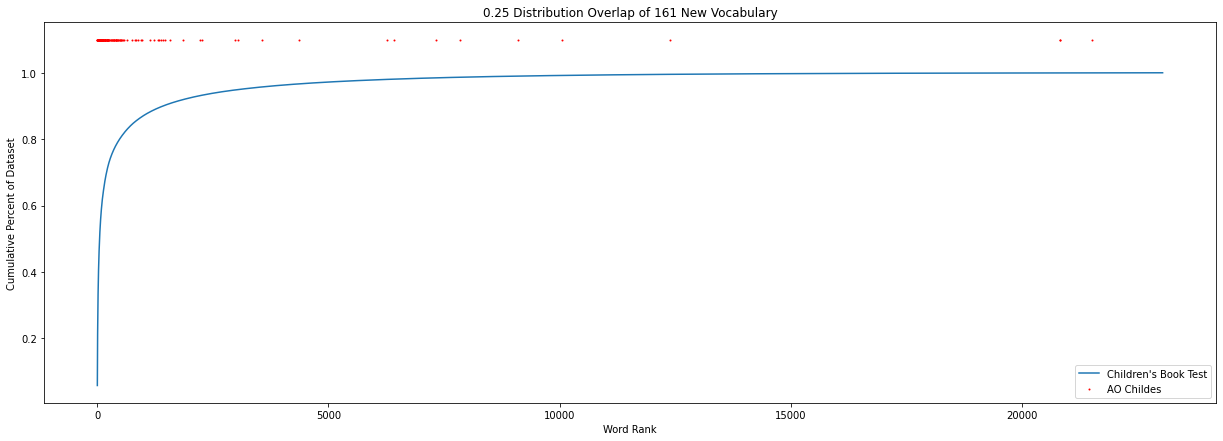

     Unnamed: 0   word      age  raw_age   freq   dict  word_rank
38           38    and  0.25017   91.312      1      1          1
9             9     to  0.25017   91.312      2      2          2
15           15      a  0.25017   91.312      3      3          3
130         130     of  0.25017   91.312      4      4          4
28           28     he  0.25017   91.312      5      5          5
..          ...    ...      ...      ...    ...    ...        ...
158         158  messy  0.25017   91.312  10045  10045      10045
55           55   dont  0.25017   91.312  12398  12398      12398
156         156  whats  0.25017   91.312  20836  20836      20836
31           31  thats  0.25017   91.312  20838  20838      20838
24           24    chi  0.25017   91.312  21531  21531      21531

[161 rows x 7 columns]
0.2501698630136986
1.4833890410958903


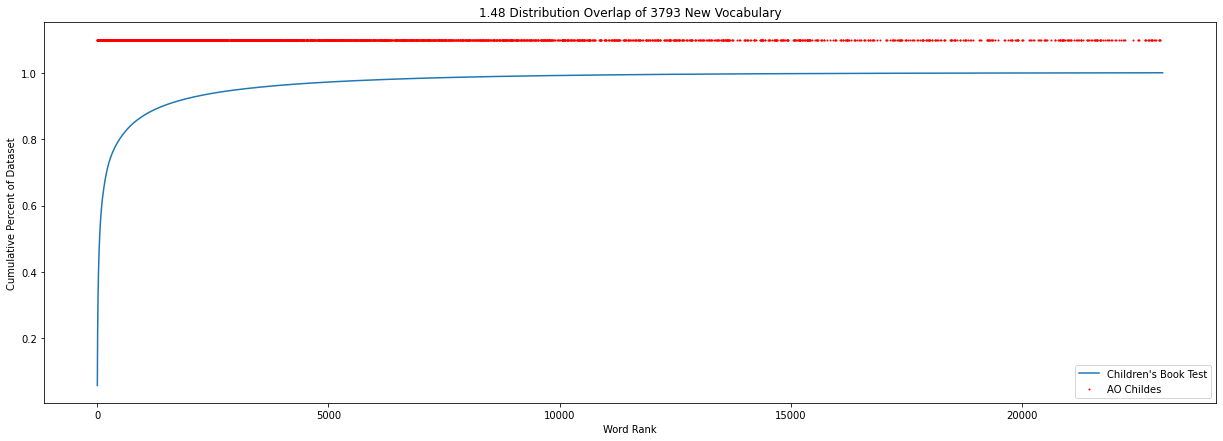

      Unnamed: 0      word       age  raw_age   freq   dict  word_rank
38            38       and  0.250170   91.312      1      1          1
9              9        to  0.250170   91.312      2      2          2
15            15         a  0.250170   91.312      3      3          3
130          130        of  0.250170   91.312      4      4          4
28            28        he  0.250170   91.312      5      5          5
...          ...       ...       ...      ...    ...    ...        ...
3373        3373     tippy  1.250855  456.562  22905  22905      22905
268          268     jeans  0.499142  182.187  22960  22960      22960
2769        2769  twinkles  1.119690  408.687  22971  22971      22971
1988        1988  doorknob  0.791608  288.937  22985  22985      22985
4248        4248    cosmos  1.447773  528.437  22998  22998      22998

[3793 rows x 7 columns]
1.4833890410958903
1.892109589041096


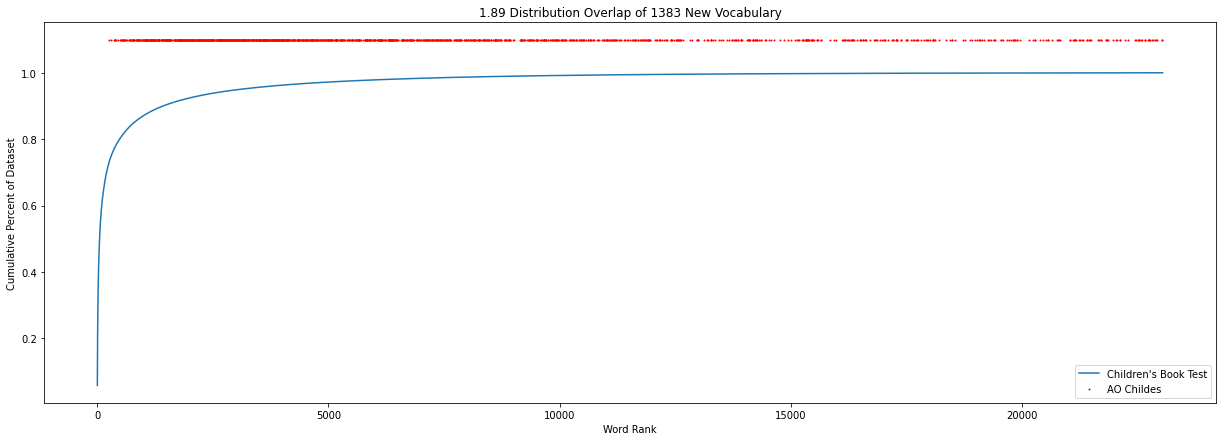

      Unnamed: 0        word       age  raw_age   freq   dict  word_rank
4588        4588        wife  1.511973  551.870    255    255        255
4901        4901        dead  1.558548  568.870    306    306        306
5716        5716        whom  1.751197  639.187    356    356        356
5996        5996      palace  1.822430  665.187    372    372        372
5050        5050    returned  1.584416  578.312    375    375        375
...          ...         ...       ...      ...    ...    ...        ...
4658        4658  purposeful  1.525671  556.870  22889  22889      22889
6101        6101         gib  1.864712  680.620  22913  22913      22913
5871        5871     suction  1.784074  651.187  22925  22925      22925
5210        5210        jess  1.622773  592.312  23031  23031      23031
5628        5628     dribble  1.722466  628.700  23038  23038      23038

[1383 rows x 7 columns]
1.892109589041096
2.292635616438356


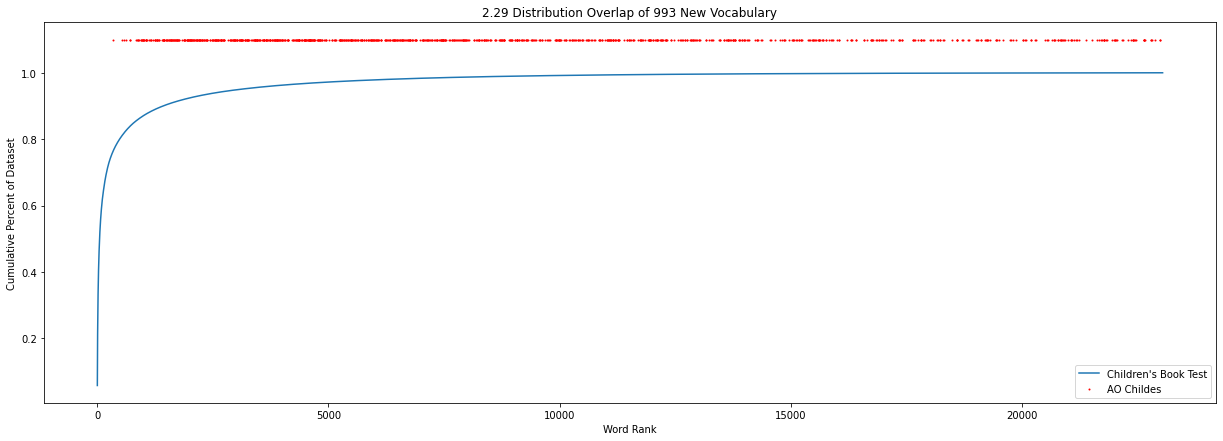

      Unnamed: 0           word       age  raw_age   freq   dict  word_rank
6460        6460            nor  1.942636  709.062    349    349        349
7084        7084       pleasant  2.125855  775.937    523    523        523
7017        7017       dreadful  2.106677  768.937    577    577        577
7296        7296          faith  2.176356  794.370    625    625        625
6415        6415        foolish  1.937156  707.062    702    702        702
...          ...            ...       ...      ...    ...    ...        ...
7250        7250         camper  2.170877  792.370  22805  22805      22805
6221        6221        pottery  1.894849  691.620  22819  22819      22819
7324        7324    illustrator  2.190055  799.370  22878  22878      22878
6893        6893     changeable  2.065753  754.000  22983  22983      22983
7568        7568  inappropriate  2.265238  826.812  23000  23000      23000

[993 rows x 7 columns]
2.292635616438356
2.6931506849315068


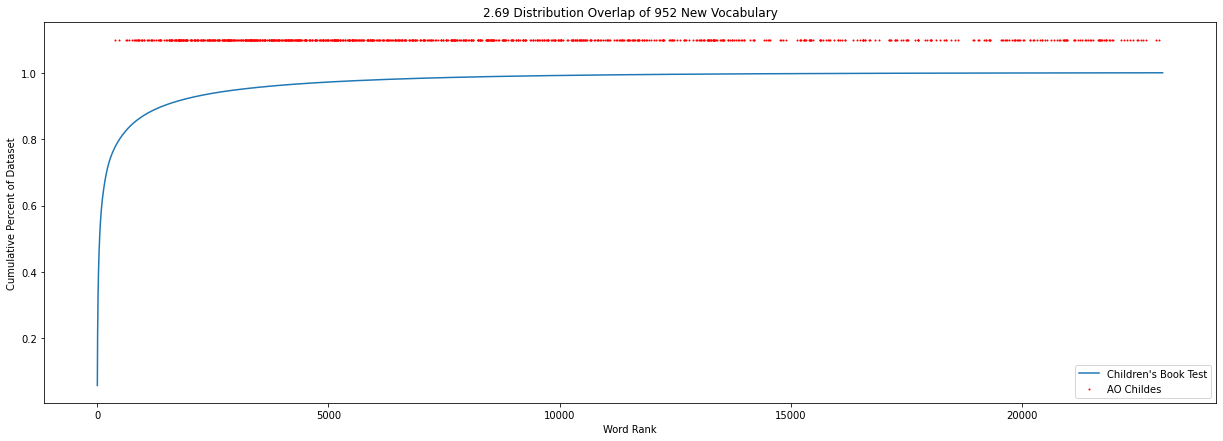

      Unnamed: 0          word       age  raw_age   freq   dict  word_rank
8896        8896          thou  2.668493  974.000    381    381        381
8516        8516         ought  2.548274  930.120    479    479        479
7702        7702         spite  2.330992  850.812    610    610        610
8738        8738     presently  2.620718  956.562    632    632        632
8564        8564          thus  2.564712  936.120    690    690        690
...          ...           ...       ...      ...    ...    ...        ...
8519        8519    rhetorical  2.548274  930.120  22584  22584      22584
8380        8380      bluefish  2.501699  913.120  22625  22625      22625
8891        8891      shanghai  2.668493  974.000  22689  22689      22689
8812        8812       planner  2.650855  967.562  22908  22908      22908
8953        8953  astoundingly  2.687671  981.000  22977  22977      22977

[952 rows x 7 columns]
2.6931506849315068
3.104621917808219


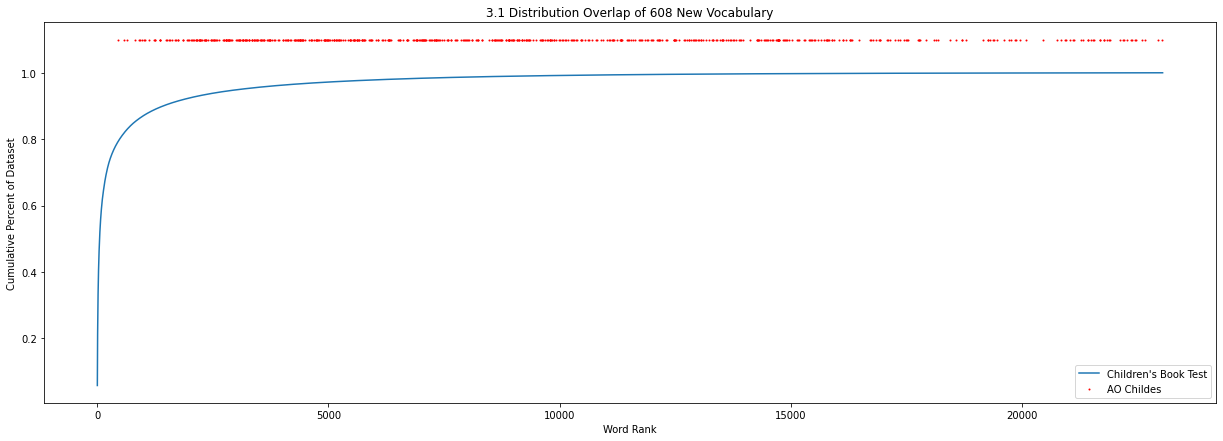

      Unnamed: 0        word       age   raw_age   freq   dict  word_rank
9052        9052     chapter  2.720548   993.000    446    446        446
9317        9317     gilbert  2.848959  1039.870    582    582        582
9107        9107         thy  2.751882  1004.437    647    647        647
9310        9310        pity  2.846219  1038.870    817    817        817
9619        9619         nat  3.001918  1095.700    895    895        895
...          ...         ...       ...       ...    ...    ...        ...
9774        9774      reflex  3.053973  1114.700  22471  22471      22471
9462        9462  complement  2.918663  1065.312  22602  22602      22602
9445        9445   embryonic  2.911973  1062.870  22670  22670      22670
9413        9413       massa  2.901014  1058.870  22938  22938      22938
9756        9756       verve  3.053973  1114.700  23025  23025      23025

[608 rows x 7 columns]
3.104621917808219
3.554438356164383


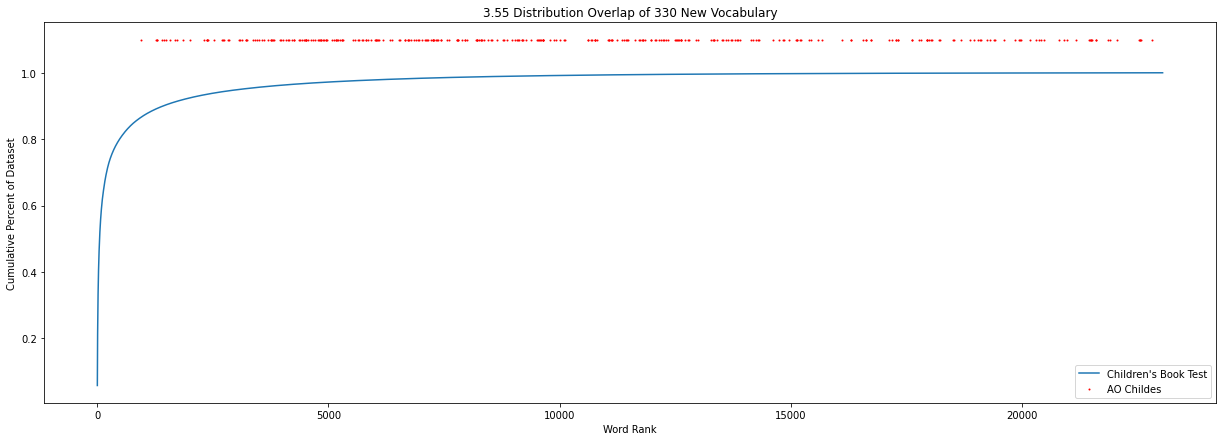

       Unnamed: 0         word       age   raw_age   freq   dict  word_rank
10278       10278         mink  3.378082  1233.000    942    942        942
10151       10151       eldest  3.296060  1203.062   1263   1263       1263
10315       10315      chamber  3.391781  1238.000   1281   1281       1281
10406       10406       reward  3.495718  1275.937   1296   1296       1296
10305       10305       terror  3.389041  1237.000   1409   1409       1409
...           ...          ...       ...       ...    ...    ...        ...
10465       10465    comprised  3.502384  1278.370  22530  22530      22530
10395       10395      hassock  3.484759  1271.937  22555  22555      22555
10427       10427  terrestrial  3.502384  1278.370  22563  22563      22563
10076       10076     overtime  3.251014  1186.620  22571  22571      22571
10449       10449   spectacled  3.502384  1278.370  22811  22811      22811

[330 rows x 7 columns]
3.554438356164383
4.180465753424658


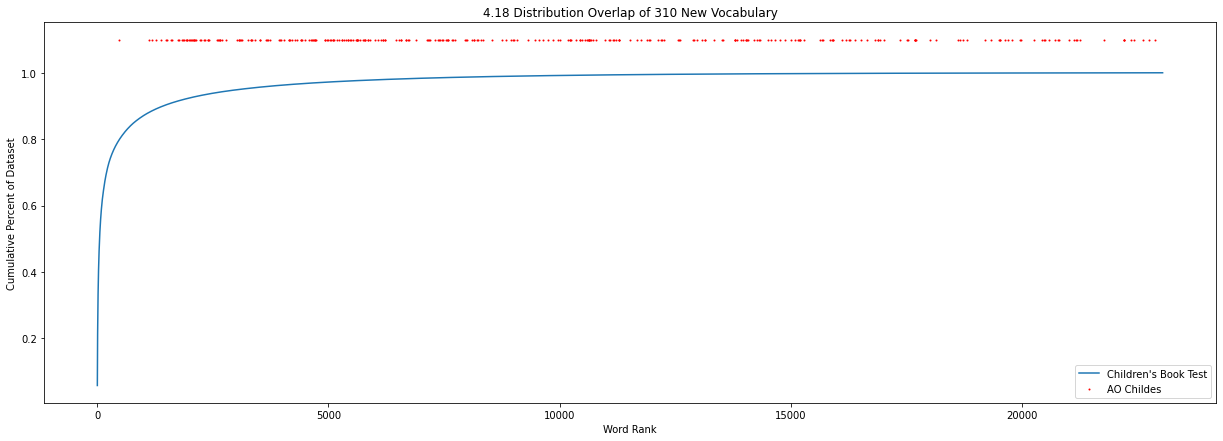

       Unnamed: 0       word       age   raw_age   freq   dict  word_rank
10814       10814      youth  3.957704  1444.562    464    464        464
10967       10967    account  4.172247  1522.870   1123   1123       1123
10716       10716      weary  3.826540  1396.687   1188   1188       1188
10721       10721  curiosity  3.826540  1396.687   1260   1260       1260
10929       10929     seldom  4.097088  1495.437   1371   1371       1371
...           ...        ...       ...       ...    ...    ...        ...
10940       10940   terminal  4.132704  1508.437  22367  22367      22367
10764       10764  disbelief  3.860603  1409.120  22425  22425      22425
10530       10530    aground  3.565397  1301.370  22615  22615      22615
10862       10862     packer  4.002740  1461.000  22754  22754      22754
10870       10870   intrepid  4.008219  1463.000  22893  22893      22893

[310 rows x 7 columns]


In [130]:
old_age = 0
for n,age in enumerate(childes_vocab_age['age'].unique()):
    if n%144==0:
        relevant_vocab = childes_vocab_age[childes_vocab_age['age'].between(old_age,age)].dropna()
        relevant_vocab = relevant_vocab[relevant_vocab['word_rank']!=0]
        print(old_age)
        print(age)
        
        plt.figure(figsize=(21,7))
        plt.title(f"{round(age,2)} Distribution Overlap of {relevant_vocab.shape[0]} New Vocabulary")
        
        plt.plot(cbt_corpus_freq['word_rank'],cbt_corpus_freq['frequency_cum_pct'], label = 'Children\'s Book Test')
#         plt.xticks(rotation = 90) 
        plt.scatter(relevant_vocab['word_rank'],[1.1]*relevant_vocab.shape[0], s = 1,c='red', label = 'AO Childes')
        plt.xlabel('Word Rank')
        plt.ylabel('Cumulative Percent of Dataset')
        plt.legend()
        plt.show()
        print(relevant_vocab.sort_values(by='word_rank'))
        old_age = age

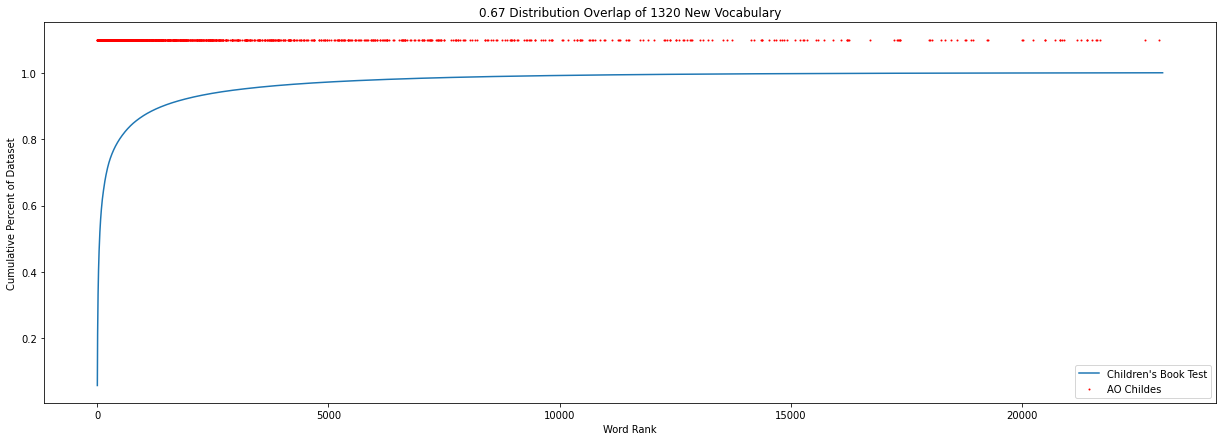

      Unnamed: 0    word       age  raw_age   freq   dict  word_rank
38            38     and  0.250170   91.312      1      1          1
9              9      to  0.250170   91.312      2      2          2
15            15       a  0.250170   91.312      3      3          3
130          130      of  0.250170   91.312      4      4          4
28            28      he  0.250170   91.312      5      5          5
...          ...     ...       ...      ...    ...    ...        ...
1036        1036  wiggly  0.616608  225.062  21609  21609      21609
296          296    whoa  0.499142  182.187  21621  21621      21621
293          293     aga  0.499142  182.187  21698  21698      21698
991          991   relax  0.605649  221.062  22669  22669      22669
268          268   jeans  0.499142  182.187  22960  22960      22960

[1320 rows x 7 columns]


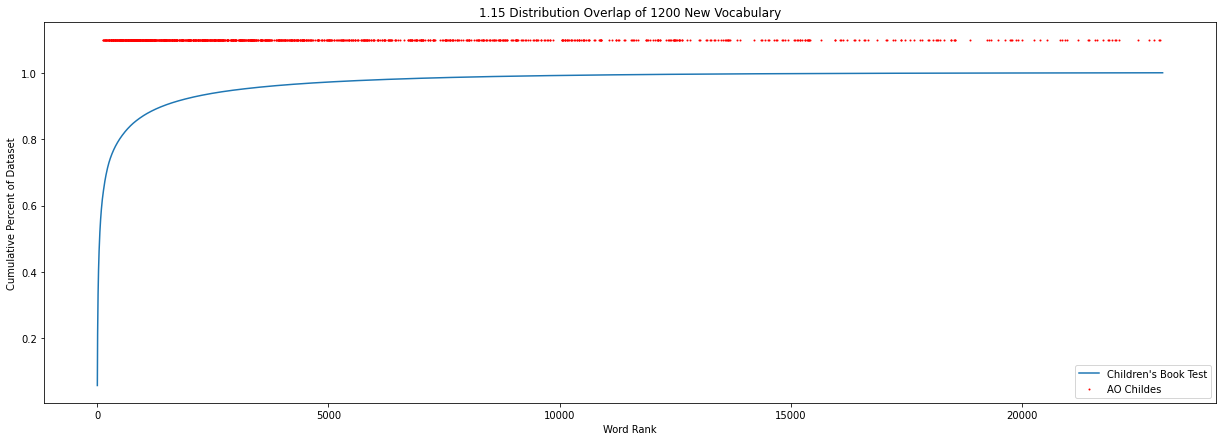

      Unnamed: 0      word       age  raw_age   freq   dict  word_rank
2758        2758      king  1.119690  408.687    112    112        112
1673        1673   himself  0.745205  272.000    114    114        114
1482        1482      told  0.712329  260.000    141    141        141
1875        1875     young  0.753252  274.937    150    150        150
2337        2337     cried  1.000548  365.200    155    155        155
...          ...       ...       ...      ...    ...    ...        ...
2650        2650        aa  1.080000  394.200  22508  22508      22508
2513        2513     basic  1.058082  386.200  22753  22753      22753
2323        2323   unscrew  1.000548  365.200  22851  22851      22851
2769        2769  twinkles  1.119690  408.687  22971  22971      22971
1988        1988  doorknob  0.791608  288.937  22985  22985      22985

[1200 rows x 7 columns]


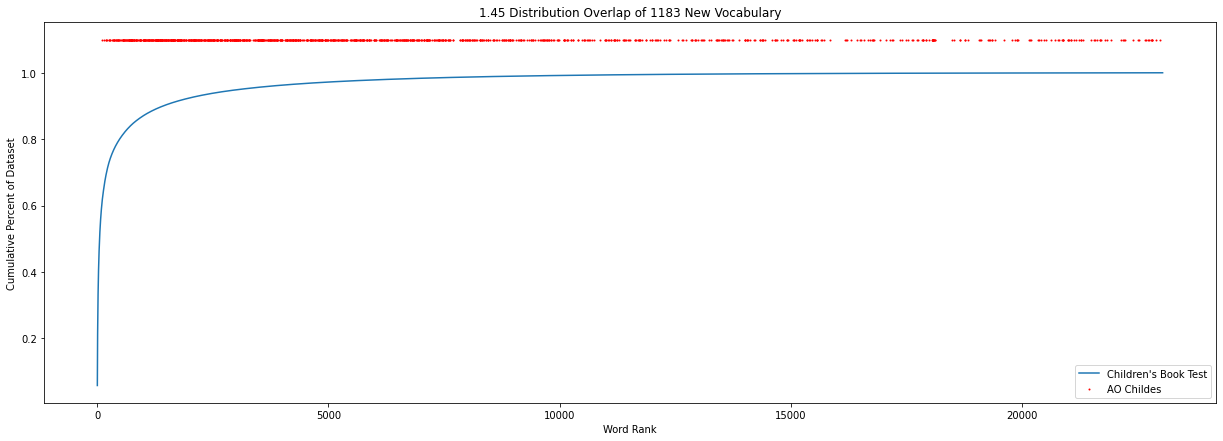

      Unnamed: 0     word       age  raw_age   freq   dict  word_rank
3360        3360    peter  1.250855  456.562    111    111        111
3655        3655     upon  1.334247  487.000    136    136        136
2939        2939    heart  1.172932  428.120    177    177        177
2930        2930   prince  1.170192  427.120    190    190        190
3022        3022  herself  1.186630  433.120    207    207        207
...          ...      ...       ...      ...    ...    ...        ...
3381        3381   theses  1.250855  456.562  22813  22813      22813
3686        3686   filler  1.334247  487.000  22816  22816      22816
4192        4192  whoopee  1.439553  525.437  22829  22829      22829
3373        3373    tippy  1.250855  456.562  22905  22905      22905
4248        4248   cosmos  1.447773  528.437  22998  22998      22998

[1183 rows x 7 columns]


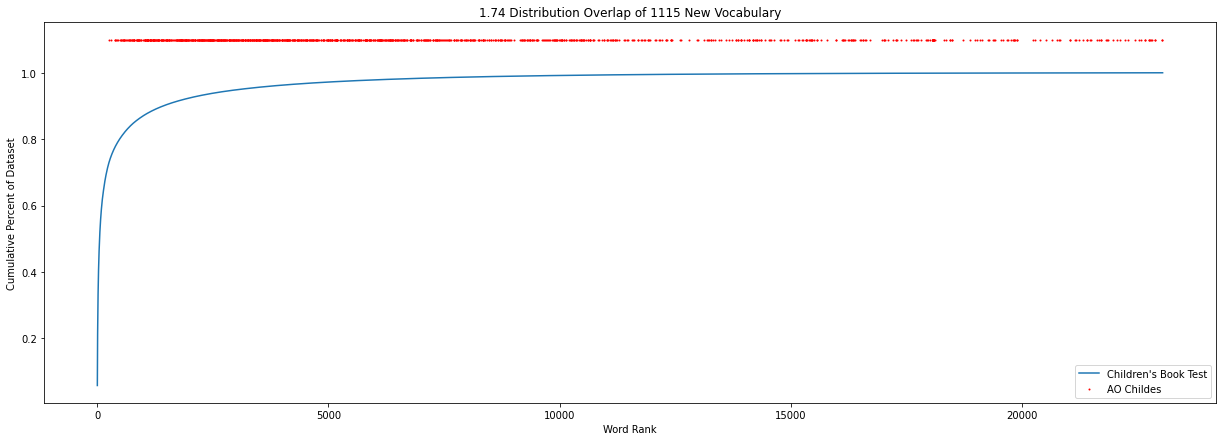

      Unnamed: 0        word       age  raw_age   freq   dict  word_rank
4588        4588        wife  1.511973  551.870    255    255        255
4901        4901        dead  1.558548  568.870    306    306        306
5050        5050    returned  1.584416  578.312    375    375        375
5350        5350       spoke  1.655649  604.312    390    390        390
4604        4604        fear  1.511973  551.870    394    394        394
...          ...         ...       ...      ...    ...    ...        ...
5365        5365       phase  1.655649  604.312  22824  22824      22824
4280        4280     obscene  1.450512  529.437  22880  22880      22880
4658        4658  purposeful  1.525671  556.870  22889  22889      22889
5210        5210        jess  1.622773  592.312  23031  23031      23031
5628        5628     dribble  1.722466  628.700  23038  23038      23038

[1115 rows x 7 columns]


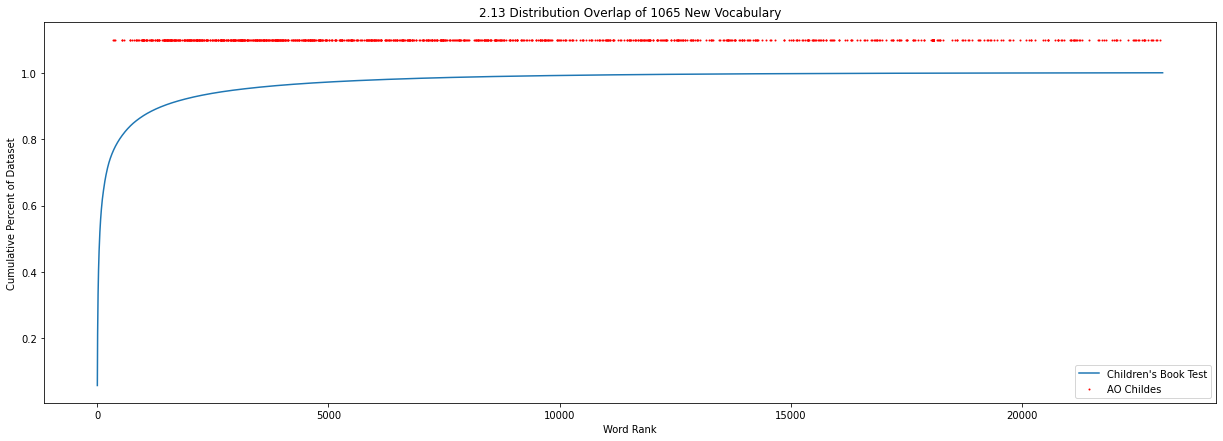

      Unnamed: 0        word       age  raw_age   freq   dict  word_rank
6460        6460         nor  1.942636  709.062    349    349        349
5716        5716        whom  1.751197  639.187    356    356        356
5996        5996      palace  1.822430  665.187    372    372        372
7084        7084    pleasant  2.125855  775.937    523    523        523
5753        5753    splendid  1.762156  643.187    525    525        525
...          ...         ...       ...      ...    ...    ...        ...
6221        6221     pottery  1.894849  691.620  22819  22819      22819
5742        5742     scrunch  1.759416  642.187  22840  22840      22840
6101        6101         gib  1.864712  680.620  22913  22913      22913
5871        5871     suction  1.784074  651.187  22925  22925      22925
6893        6893  changeable  2.065753  754.000  22983  22983      22983

[1065 rows x 7 columns]


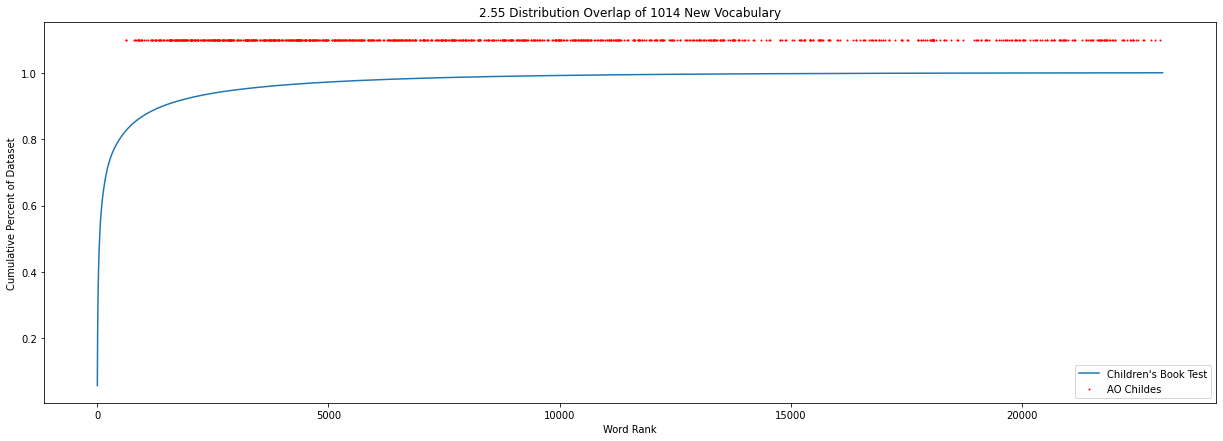

      Unnamed: 0           word       age  raw_age   freq   dict  word_rank
7702        7702          spite  2.330992  850.812    610    610        610
7296        7296          faith  2.176356  794.370    625    625        625
7639        7639         walter  2.300855  839.812    793    793        793
7751        7751         maiden  2.340274  854.200    820    820        820
8322        8322         likely  2.500512  912.687    833    833        833
...          ...            ...       ...      ...    ...    ...        ...
8380        8380       bluefish  2.501699  913.120  22625  22625      22625
7384        7384        diffuse  2.203753  804.370  22644  22644      22644
7250        7250         camper  2.170877  792.370  22805  22805      22805
7324        7324    illustrator  2.190055  799.370  22878  22878      22878
7568        7568  inappropriate  2.265238  826.812  23000  23000      23000

[1014 rows x 7 columns]


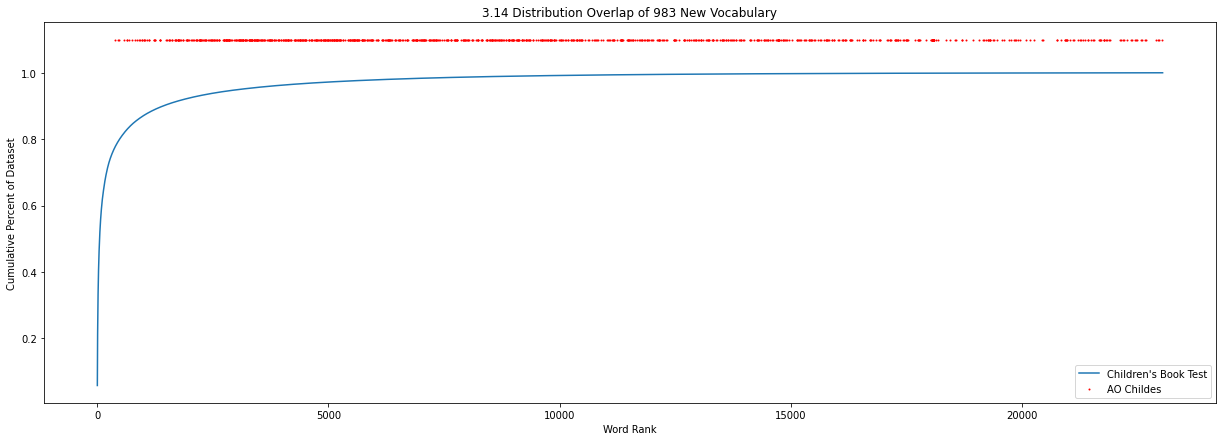

      Unnamed: 0          word       age   raw_age   freq   dict  word_rank
8896        8896          thou  2.668493   974.000    381    381        381
9052        9052       chapter  2.720548   993.000    446    446        446
8516        8516         ought  2.548274   930.120    479    479        479
9317        9317       gilbert  2.848959  1039.870    582    582        582
8738        8738     presently  2.620718   956.562    632    632        632
...          ...           ...       ...       ...    ...    ...        ...
8891        8891      shanghai  2.668493   974.000  22689  22689      22689
8812        8812       planner  2.650855   967.562  22908  22908      22908
9413        9413         massa  2.901014  1058.870  22938  22938      22938
8953        8953  astoundingly  2.687671   981.000  22977  22977      22977
9756        9756         verve  3.053973  1114.700  23025  23025      23025

[983 rows x 7 columns]


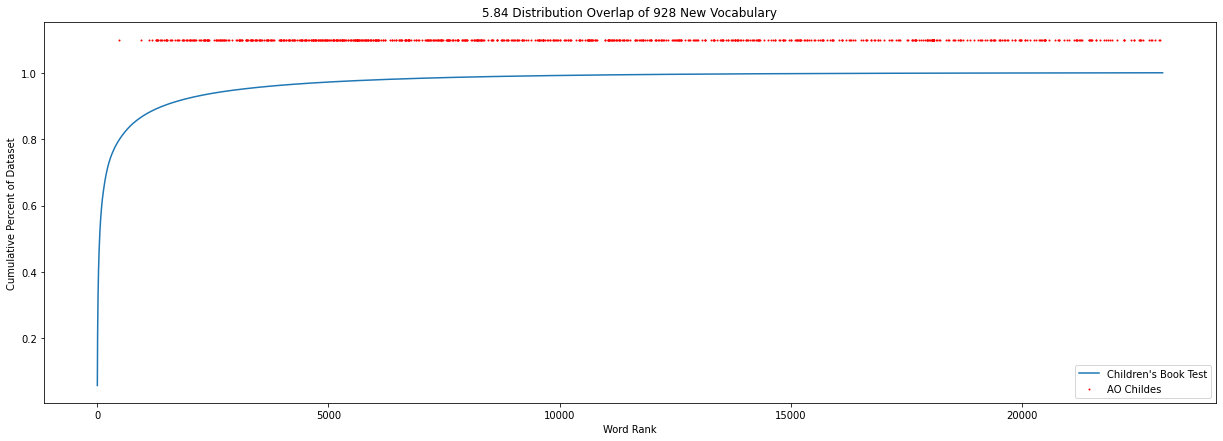

       Unnamed: 0        word       age   raw_age   freq   dict  word_rank
10814       10814       youth  3.957704  1444.562    464    464        464
10278       10278        mink  3.378082  1233.000    942    942        942
10967       10967     account  4.172247  1522.870   1123   1123       1123
10716       10716       weary  3.826540  1396.687   1188   1188       1188
10721       10721   curiosity  3.826540  1396.687   1260   1260       1260
...           ...         ...       ...       ...    ...    ...        ...
11151       11151  incidental  4.505808  1644.620  22807  22807      22807
10449       10449  spectacled  3.502384  1278.370  22811  22811      22811
10870       10870    intrepid  4.008219  1463.000  22893  22893      22893
11249       11249      measly  4.853068  1771.370  22966  22966      22966
11028       11028     senator  4.232521  1544.870  22993  22993      22993

[928 rows x 7 columns]


In [136]:
for n in range(8):
    relevant_vocab = childes_vocab_age.iloc[n*1419:(n+1)*1419]
    relevant_vocab = relevant_vocab[relevant_vocab['word_rank']!=0]
    age = relevant_vocab.iloc[-1]['age']
    plt.figure(figsize=(21,7))
    plt.title(f"{round(age,2)} Distribution Overlap of {relevant_vocab.shape[0]} New Vocabulary")

    plt.plot(cbt_corpus_freq['word_rank'],cbt_corpus_freq['frequency_cum_pct'], label = 'Children\'s Book Test')
#         plt.xticks(rotation = 90) 
    plt.scatter(relevant_vocab['word_rank'],[1.1]*relevant_vocab.shape[0], s = 1,c='red', label = 'AO Childes')
    plt.xlabel('Word Rank')
    plt.ylabel('Cumulative Percent of Dataset')
    plt.legend()
    plt.show()
    print(relevant_vocab.sort_values(by='word_rank'))

## Grammar Operationalizing

### Length of Sentence

In [65]:
base_ds = ds.pipeline.df.groupby('target_child_age')['gloss'].apply(lambda x: '.'.join(x)).reset_index()

In [66]:
base_ds['sentences'] = base_ds['gloss'].apply(lambda x: x.split('.'))
base_ds['sentences_split'] = base_ds['sentences'].apply(lambda x: [y.split(' ') for y in x])
base_ds['sentences_lengths'] = base_ds['sentences_split'].apply(lambda x: sum(len(y) for y in x)/len(x))

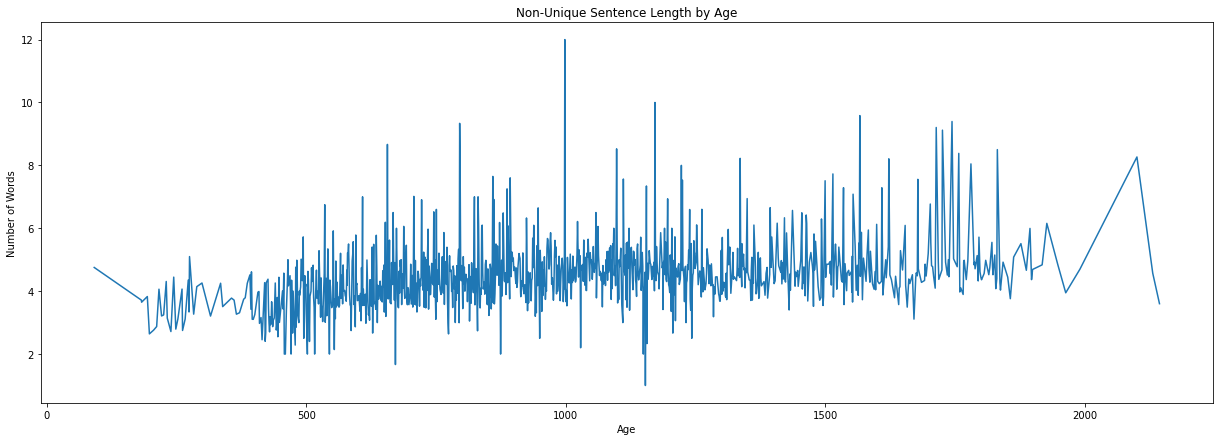

In [75]:
plt.figure(figsize=(21,7))
plt.title(f"Non-Unique Sentence Length by Age")
plt.xlabel('Age')
plt.ylabel('Number of Words')
plt.plot(base_ds['target_child_age'],base_ds['sentences_lengths'])

In [77]:
base_ds['sentences_sets'] = base_ds['sentences_split'].apply(lambda x: [set(y) for y in x])
base_ds['sentences_sets_lengths'] = base_ds['sentences_sets'].apply(lambda x: sum(len(y) for y in x)/len(x))

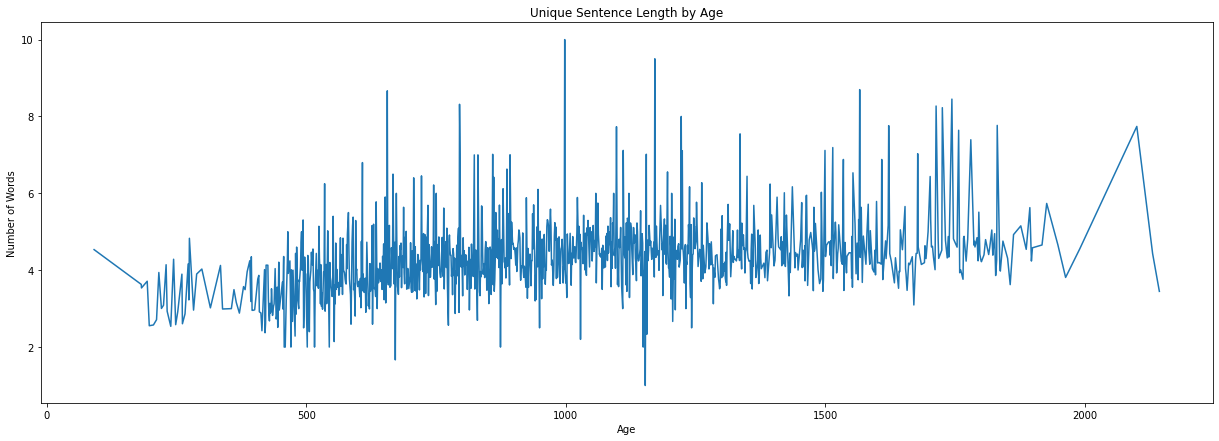

In [80]:
plt.figure(figsize=(21,7))
plt.title(f"Unique Sentence Length by Age")
plt.xlabel('Age')
plt.ylabel('Number of Words')
plt.plot(base_ds['target_child_age'],base_ds['sentences_sets_lengths'])

## Trigger Words

In [87]:
'''
NI: Noun Initiator
'''
NI_list = ['just','both','only','all']
for NI in NI_list:
    base_ds[f'NI_{NI}_c'] = base_ds['gloss'].apply(lambda x: x.count(NI))
base_ds['NI_c'] = base_ds[f'NI_just_c'] + base_ds[f'NI_both_c'] + base_ds[f'NI_only_c'] + base_ds[f'NI_all_c']
base_ds['num_sentences'] = base_ds['sentences'].apply(lambda x: len(x))

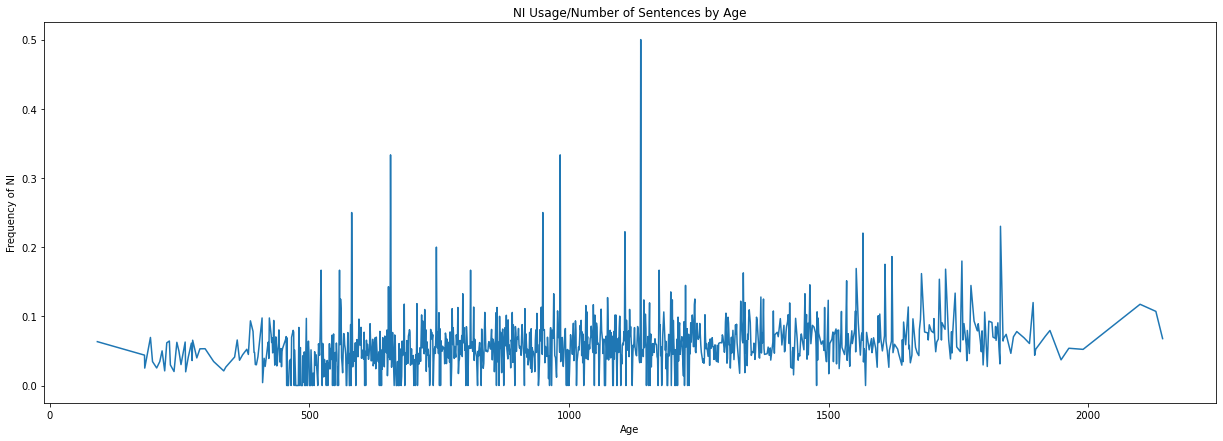

In [91]:
plt.figure(figsize=(21,7))
plt.title(f"NI Usage/Number of Sentences by Age")
plt.xlabel('Age')
plt.ylabel('Frequency of NI')
plt.plot(base_ds['target_child_age'],base_ds['NI_c']/base_ds['num_sentences'] )

In [90]:
'''
PM: Post-modifiers
'''
PM_list = ['who','when','while']
for PM in PM_list:
    base_ds[f'PM_{PM}_c'] = base_ds['gloss'].apply(lambda x: x.count(PM))
base_ds['PM_c'] = base_ds[f'PM_who_c']

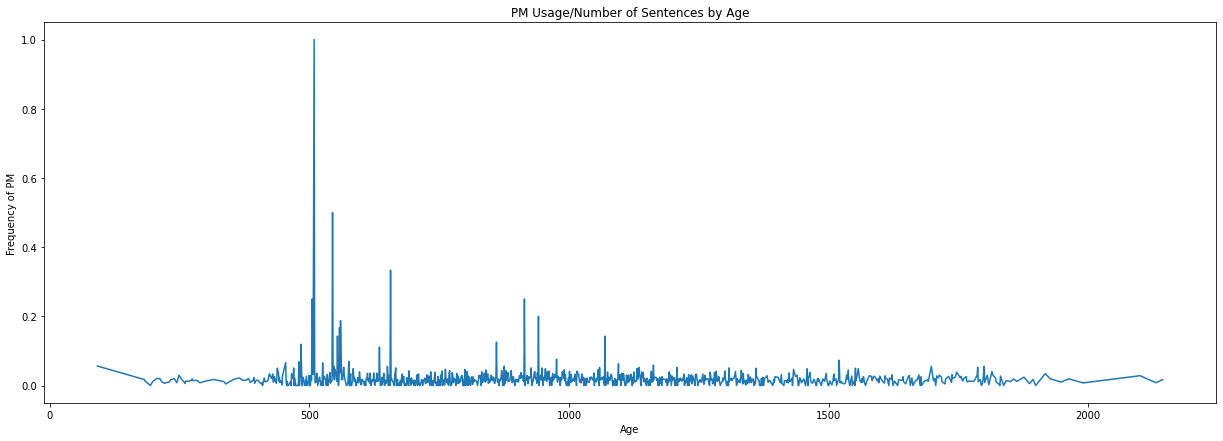

In [106]:
plt.figure(figsize=(21,7))
plt.title(f"PM Usage/Number of Sentences by Age")
plt.xlabel('Age')
plt.ylabel('Frequency of PM')
plt.plot(base_ds['target_child_age'],base_ds['PM_c']/base_ds['num_sentences'] )

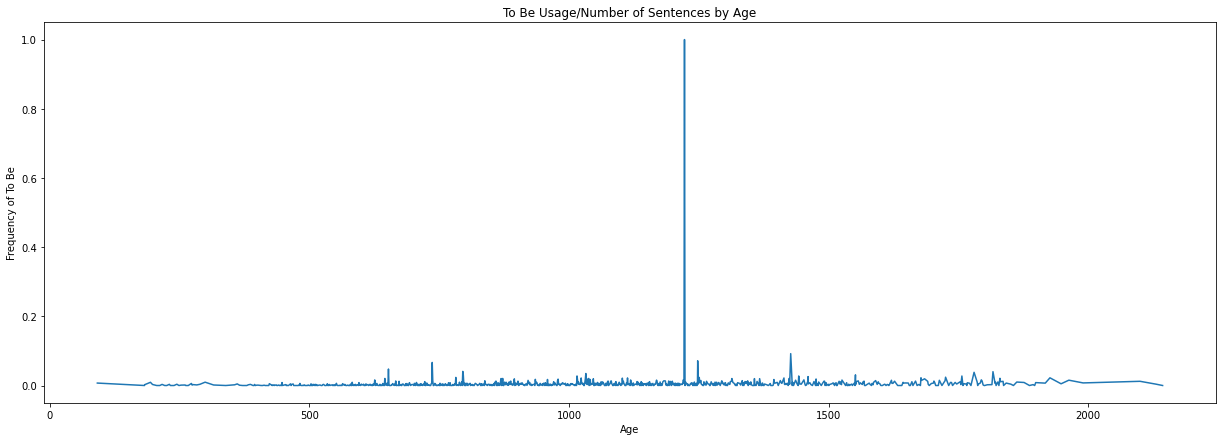

In [107]:
'''
PM: Post-modifiers
'''
tb_list = ['to be']
for tb in tb_list:
    base_ds[f'tb_tobe_c'] = base_ds['gloss'].apply(lambda x: x.count(tb))
base_ds['tobe_c'] = base_ds[f'tb_tobe_c']

plt.figure(figsize=(21,7))
plt.title(f"To Be Usage/Number of Sentences by Age")
plt.xlabel('Age')
plt.ylabel('Frequency of To Be')
plt.plot(base_ds['target_child_age'],base_ds['tobe_c']/base_ds['num_sentences'] )

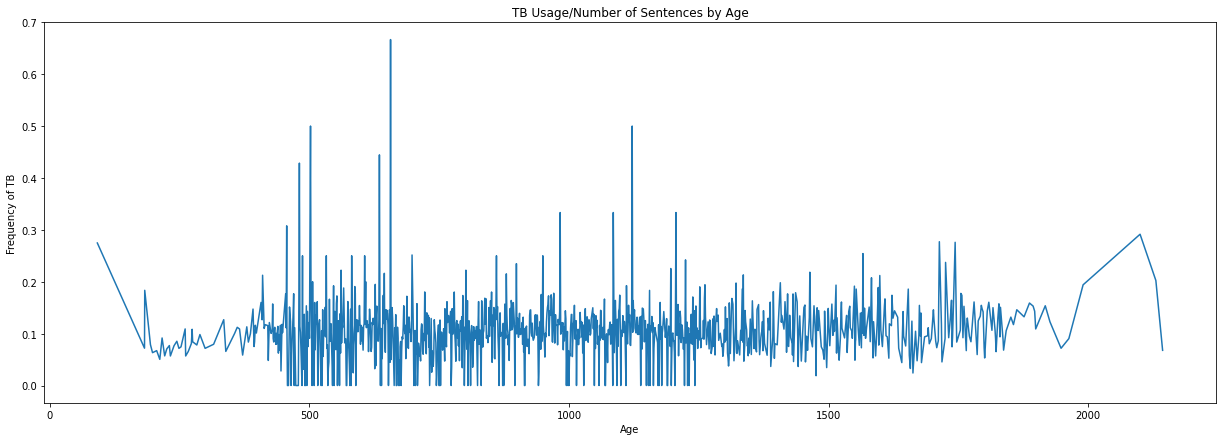

In [108]:
'''
OM: Post-modifiers
'''
tb_list = ['that']
for tb in tb_list:
    base_ds[f'tb_tobe_c'] = base_ds['gloss'].apply(lambda x: x.count(tb))
base_ds['tobe_c'] = base_ds[f'tb_tobe_c']

plt.figure(figsize=(21,7))
plt.title(f"TB Usage/Number of Sentences by Age")
plt.xlabel('Age')
plt.ylabel('Frequency of TB')
plt.plot(base_ds['target_child_age'],base_ds['tobe_c']/base_ds['num_sentences'] )

In [ ]:
'''
Limit wh embeddings by making sure it's not first word of a sentence!
'''

In [1]:
import random

rnd = ['Maggie','Lisa','Tyler','Dan','Matthew','Will','Surendra','Paulina','Nick','Miles']
exceptions = ['Matthew']

rnd_filt = [cool_person for cool_person in rnd if cool_person not in exceptions]
random.shuffle(rnd_filt)
rnd_filt
for cool_person in rnd_filt[:5]:
    print(f"@{cool_person}")

@Will
@Surendra
@Lisa
@Paulina
@Miles
